In [78]:
import os
os.environ["SCIPY_ARRAY_API"] = "1"

In [79]:
import requests
import pandas as pd
import time
import requests
import pandas as pd


# Load the annotated file
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/combined_de_genes_annotated.csv")
df.head(5)

# Select and reorder relevant columns
# final_df = df[[
#     "Gene_upper", "Dataset", "p_value", "log2_fc", "mean_diff",
#     "DGIdb_status", "BreastCancerTrial", "Pathway"
# ]].rename(columns={
#     "Gene_upper": "Gene",
#     "p_value": "P-value",
#     "log2_fc": "log2FC",
#     "mean_diff": "Mean Difference",
#     "DGIdb_status": "DGIdb Status",
#     "BreastCancerTrial": "Has Breast Cancer Trial",
#     "Pathway": "Pathway Category"
# })

# Sort by Dataset and then log2FC
#final_df = final_df.sort_values(by=["Dataset", "log2FC"], ascending=[True, False])

# Save the final table
#final_df.to_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table.csv", index=False)
#print("✅ Final master table saved as final_master_gene_table.csv")

,gene,p_value,log2_fc,mean_diff,Dataset,Gene_upper,DGIdb_status,BreastCancerTrial,Pathway
0,CDK4,0.0,2.428112,0.105542,GSE180286,CDK4,FDA-approved,True,CDK4–CCND1 Axis
1,CDKN1A,0.0,3.365022,0.134859,GSE180286,CDKN1A,NaN,False,Other
2,ERBB2,0.0,4.833174,0.267847,GSE180286,ERBB2,FDA-approved,True,Other
3,CCND1,0.0,4.525871,0.483840,GSE180286,CCND1,NaN,True,CDK4–CCND1 Axis
4,CDKN2A,0.0,3.926487,0.074630,GSE180286,CDKN2A,NaN,False,Other


In [80]:
df1 = pd.read_csv("~/Desktop/Capstone/Notebook recent/combined_de_genes.csv")
df1.head(5)

,gene,p_value,log2_fc,mean_diff,Dataset
0,CDK4,0.0,2.428112,0.105542,GSE180286
1,CDKN1A,0.0,3.365022,0.134859,GSE180286
2,ERBB2,0.0,4.833174,0.267847,GSE180286
3,CCND1,0.0,4.525871,0.483840,GSE180286
4,CDKN2A,0.0,3.926487,0.074630,GSE180286


In [20]:
import pandas as pd

# 🔹 Step 1: Load the annotated gene table
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/combined_de_genes_annotated.csv")

# 🔹 Step 2: Basic cleanup
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted")
df["BreastCancerTrial"] = df["BreastCancerTrial"].astype(bool)

# Optional: drop redundant columns if needed
# df = df.drop(columns=["gene", "Gene_upper"])  # if you want to keep only one column for gene name

# 🔹 Step 3: Select and rename columns for clarity
final_df = df[[
    "Gene_upper", "Dataset", "p_value", "log2_fc", "mean_diff",
    "DGIdb_status", "BreastCancerTrial", "Pathway"
]].rename(columns={
    "Gene_upper": "Gene",
    "p_value": "P-value",
    "log2_fc": "log2FC",
    "mean_diff": "Mean Difference",
    "DGIdb_status": "DGIdb Status",
    "BreastCancerTrial": "Has Breast Cancer Trial",
    "Pathway": "Pathway Category"
})

# 🔹 Step 4: Sort by dataset and log2 fold-change
final_df = final_df.sort_values(by=["Dataset", "log2FC"], ascending=[True, False])

# 🔹 Step 5: Save to disk
final_df.to_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table_24July.csv", index=False)
print("✅ Final master table saved as final_master_gene_table_24July.csv")


✅ Final master table saved as final_master_gene_table_24July.csv


In [81]:
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table_24July.csv")
print(df.head(5))
print(df.columns)

     Gene    Dataset       P-value    log2FC  Mean Difference  DGIdb Status  \
0     WT1  GSE161529  1.302410e-46  3.432435         0.001784  Not Targeted   
1   ERBB2  GSE161529  0.000000e+00  3.260088         0.789027  FDA-approved   
2     MET  GSE161529  0.000000e+00  3.249633         0.127505  Not Targeted   
3  CDKN2A  GSE161529  0.000000e+00  3.184546         0.404804  Not Targeted   
4    EGFR  GSE161529  0.000000e+00  3.021959         0.151644  FDA-approved   

   Has Breast Cancer Trial Pathway Category  
0                    False            Other  
1                     True            Other  
2                    False            Other  
3                    False            Other  
4                     True   PI3K–MAPK–EGFR  
Index(['Gene', 'Dataset', 'P-value', 'log2FC', 'Mean Difference',
       'DGIdb Status', 'Has Breast Cancer Trial', 'Pathway Category'],
      dtype='object')


In [23]:
import altair as alt

bar_pathway = alt.Chart(df).mark_bar().encode(
    x=alt.X('Gene:N', sort='-y', title='Gene', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('log2FC:Q', title='log2 Fold Change'),
    color=alt.Color('Pathway Category:N'),
    tooltip=['Gene', 'log2FC', 'Pathway Category']
).properties(
    title='log2FC of Genes by Pathway Category',
    width=600,
    height=400
)

bar_pathway.show()


alt.Chart(...)

In [24]:
import altair as alt

bar_dgidb = alt.Chart(df).mark_bar().encode(
    x=alt.X('Gene:N', sort='-y', title='Gene', axis=alt.Axis(labelAngle=45)),
    y=alt.Y('log2FC:Q', title='log2 Fold Change'),
    color=alt.Color('DGIdb Status:N'),
    tooltip=['Gene', 'log2FC', 'DGIdb Status']
).properties(
    title='log2FC of Genes by Drug Status (DGIdb)',
    width=600,
    height=400
)

bar_dgidb.show()


alt.Chart(...)

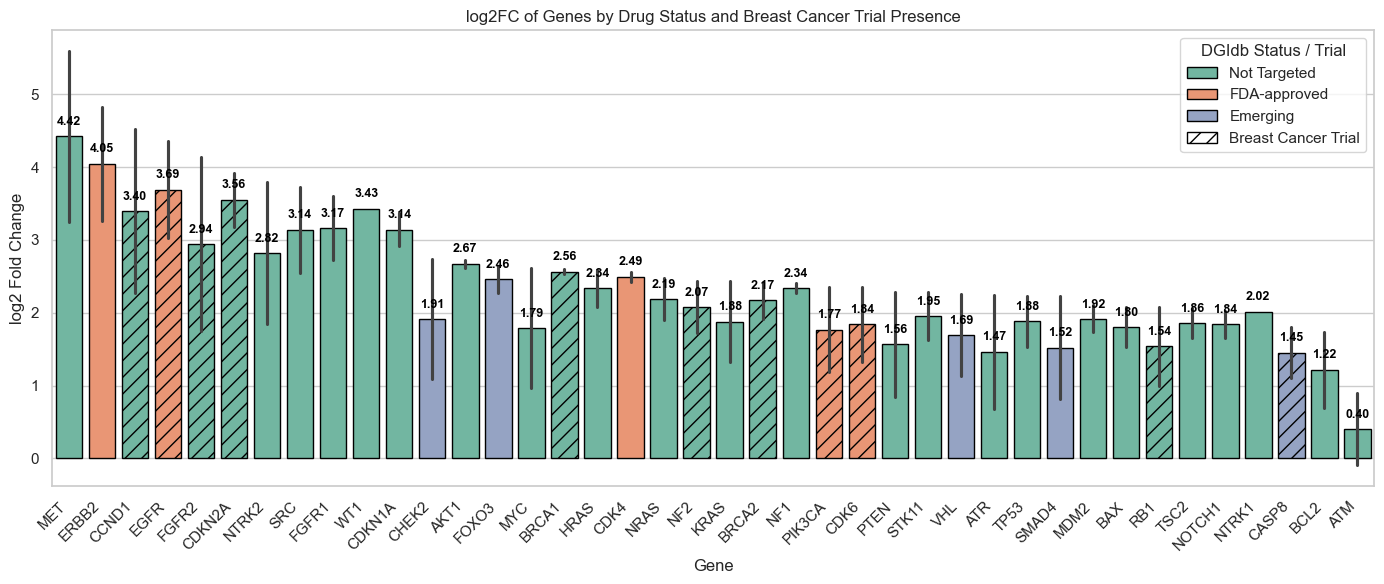

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# Load the data
#df = pd.read_csv("final_master_gene_table.csv")
#df = pd.read_csv("final_master_gene_table_24July.csv")
df = pd.read_csv("../final_master_gene_table_24July.csv")

# Fill missing DGIdb status
#df["DGIdb Status"] = df["DGIdb Status"].fillna("Unknown")
df['DGIdb Status'] = df['DGIdb Status'].fillna('No known drugs')


# Map Boolean to string for consistency
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Yes", False: "No"})

# Sort by log2FC
df = df.sort_values("log2FC", ascending=False)

# Set up the plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Define hatches for bar patterns
hatches = ["//" if x == "Yes" else "" for x in df["Has Breast Cancer Trial"]]

# Create barplot
ax = sns.barplot(
    x="Gene",
    y="log2FC",
    hue="DGIdb Status",
    data=df,
    dodge=False,
    palette="Set2",
    edgecolor="black"
)

# Apply hatch pattern per bar
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)

# ✅ Add values above bars
for p in ax.patches:
    height = p.get_height()
    if not pd.isna(height) and height > 0:
        ax.annotate(
            f"{height:.2f}",
            xy=(p.get_x() + p.get_width() / 2., height),
            xytext=(0, 6),  # shift text 6 points above the bar
            textcoords="offset points",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold',
            color='black'
        )

# Apply hatch pattern per bar
for bar, hatch in zip(ax.patches, hatches):
    bar.set_hatch(hatch)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
plt.ylabel("log2 Fold Change")
plt.xlabel("Gene")
plt.title("log2FC of Genes by Drug Status and Breast Cancer Trial Presence")

# Add legend for hatches
#hatch_legend = [mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='Breast Cancer Trial')]
#plt.legend(handles=ax.get_legend().legendHandles + hatch_legend, title="DGIdb Status / Trial", loc="upper right")
#plt.legend(handles=ax.legend_.legendHandles + hatch_legend, title="DGIdb Status / Trial", loc="upper right")

hatch_legend = [mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='Breast Cancer Trial')]
# Get existing handles and labels
handles, labels = ax.get_legend_handles_labels()
# Add the new hatch legend and show
plt.legend(
    handles + hatch_legend,
    labels + ["Breast Cancer Trial"],
    title="DGIdb Status / Trial",
    loc="upper right"
)

plt.tight_layout()
# ✅ Save the figure before showing it
plt.savefig("gene_log2FC_drug_trial_plot.png", dpi=300, bbox_inches='tight')  # or .pdf

plt.show()

/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_51679/3824986119.py:38: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



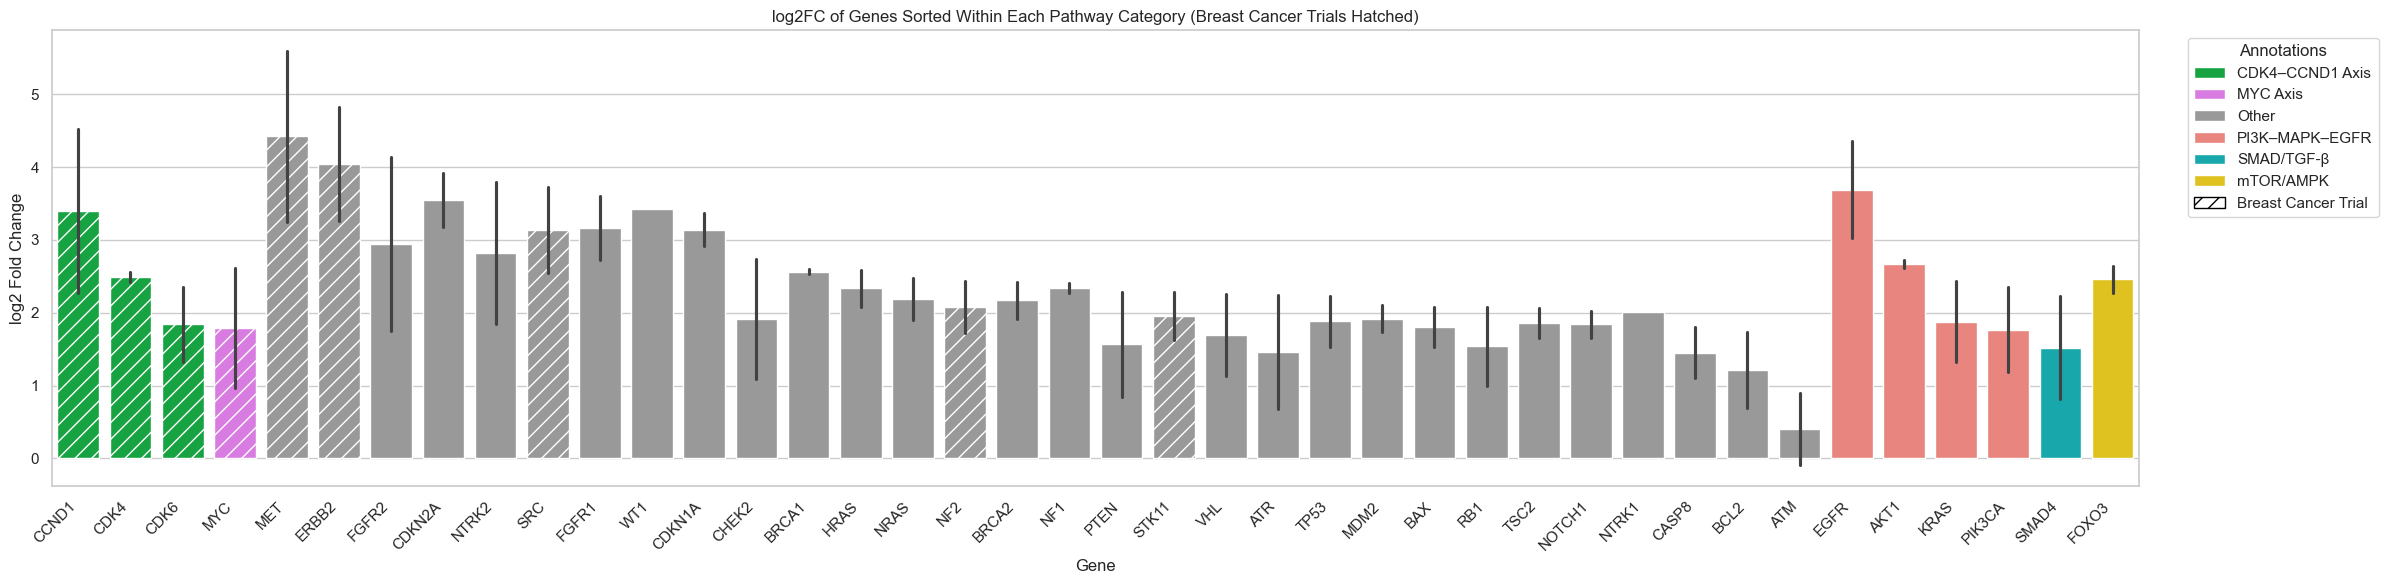

In [27]:
from matplotlib.patches import Patch
# Load your CSV
#df = pd.read_csv("final_master_gene_table.csv")

# Define colors for pathway categories
pathway_palette = {
    "PI3K–MAPK–EGFR": "#F8766D",
    "CDK4–CCND1 Axis": "#00BA38",
    "MYC Axis": "#E76BF3",
    "mTOR/AMPK": "#FFD700",
    "SMAD/TGF-β": "#00BFC4",
    "Other": "#999999"
}

#Fix vague labels
df["DGIdb Status"] = df["DGIdb Status"].replace({"null": "No known drugs"})
df["Pathway Category"] = df["Pathway Category"].fillna("Other")

# Sort by Pathway and then by log2FC descending
df_sorted = df.sort_values(by=["Pathway Category", "log2FC"], ascending=[True, False]).reset_index(drop=True)

# Set gene order for plotting
#df_sorted["Gene"] = pd.Categorical(df_sorted["Gene"], categories=df_sorted["Gene"], ordered=True)
df_sorted["Gene"] = pd.Categorical(df_sorted["Gene"], categories=df_sorted["Gene"].unique(), ordered=True)


# Plot
plt.figure(figsize=(24, 6))
ax = sns.barplot(
    data=df_sorted,
    x="Gene", y="log2FC",
    hue="Pathway Category",
    dodge=False,
    palette=pathway_palette,
    order=df_sorted["Gene"]
)
# Rotate x labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add hatching for breast cancer trial genes
bars = ax.patches
for bar, (_, row) in zip(bars, df_sorted.iterrows()):
    if row["Has Breast Cancer Trial"] == "Yes":
        bar.set_hatch("//")

# Title and labels
plt.title("log2FC of Genes Sorted Within Each Pathway Category (Breast Cancer Trials Hatched)")
plt.ylabel("log2 Fold Change")
plt.xlabel("Gene")

# Custom legend with hatching
handles, labels = ax.get_legend_handles_labels()
handles.append(Patch(facecolor='white', edgecolor='black', hatch='//', label='Breast Cancer Trial'))
ax.legend(handles=handles, title="Annotations", bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

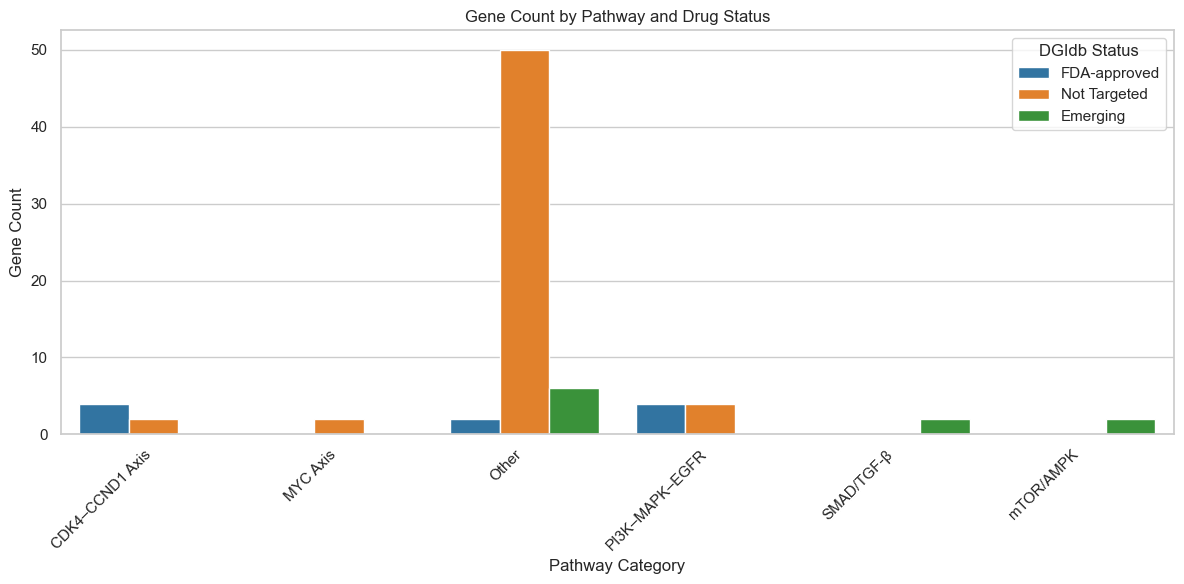

In [28]:
#Pathway × DGIdb status (i.e., therapeutic landscape summary)

grouped = df.groupby(["Pathway Category", "DGIdb Status"]).size().reset_index(name="Gene Count")

plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x="Pathway Category", y="Gene Count", hue="DGIdb Status", palette="tab10")
plt.xticks(rotation=45, ha='right')
plt.title("Gene Count by Pathway and Drug Status")
plt.tight_layout()
plt.show()



In [29]:
import altair as alt
import pandas as pd

# Assume df_annotated is your DataFrame with 'Gene', 'Refined Pathway Category', 'log2FC'
#df = df_annotated.copy()
df = df[df["log2FC"] > 0]  # Only meaningful values

dotplot = alt.Chart(df).mark_circle().encode(
    x=alt.X("Pathway Category:N", title="Pathway", sort="-y"),
    y=alt.Y("Gene:N", title="Gene", sort="-x"),
    size=alt.Size("log2FC:Q", title="log2FC"),
    color=alt.Color("log2FC:Q", scale=alt.Scale(scheme="viridis")),
    tooltip=["Gene", "Pathway Category", "log2FC"]
).properties(
    title="log2FC Dot Plot by Gene and Pathway",
    width=600,
    height=400
).interactive()

dotplot



alt.Chart(...)

In [30]:
# Manually curated mapping for "Other" genes into more informative categories
manual_reclassification = {
    "TP53": "DNA Repair / Checkpoints",
    "CDKN1A": "Cell Cycle & Apoptosis",
    "CDKN2A": "Cell Cycle & Apoptosis",
    "RB1": "Cell Cycle & Apoptosis",
    "CDK4": "Cell Cycle & Apoptosis",
    "CDK6": "Cell Cycle & Apoptosis",
    "BCL2": "Cell Cycle & Apoptosis",
    "BAX": "Cell Cycle & Apoptosis",
    "ATM": "DNA Repair / Checkpoints",
    "ATR": "DNA Repair / Checkpoints",
    "CHEK2": "DNA Repair / Checkpoints",
    "WT1": "Cell Cycle & Apoptosis",
    "SMAD4": "TGF-β / SMAD Signaling",
    "NF1": "RAS Pathway",
    "NF2": "RAS Pathway",
    "HRAS": "RAS Pathway",
    "NRAS": "RAS Pathway"
}

# Function to apply new subcategories
def refine_pathway(row):
    if row["Pathway Category"] == "Other":
        return manual_reclassification.get(row["Gene"], "Unannotated")
    else:
        return row["Pathway Category"]

# Apply refinement
df["Refined Pathway Category"] = df.apply(refine_pathway, axis=1)
print(df["Refined Pathway Category"].value_counts())

Refined Pathway Category
Unannotated                 31
Cell Cycle & Apoptosis      11
PI3K–MAPK–EGFR               8
RAS Pathway                  8
DNA Repair / Checkpoints     7
CDK4–CCND1 Axis              6
mTOR/AMPK                    2
MYC Axis                     2
SMAD/TGF-β                   2
Name: count, dtype: int64


In [24]:
# Manually curated mapping for "Other" genes into more informative categories
# manual_reclassification = {
#     "TP53": "DNA Repair / Checkpoints",
#     "CDKN1A": "Cell Cycle & Apoptosis",
#     "CDKN2A": "Cell Cycle & Apoptosis",
#     "RB1": "Cell Cycle & Apoptosis",
#     "CDK4": "Cell Cycle & Apoptosis",
#     "CDK6": "Cell Cycle & Apoptosis",
#     "BCL2": "Cell Cycle & Apoptosis",
#     "BAX": "Cell Cycle & Apoptosis",
#     "ATM": "DNA Repair / Checkpoints",
#     "ATR": "DNA Repair / Checkpoints",
#     "CHEK2": "DNA Repair / Checkpoints",
#     "WT1": "Cell Cycle & Apoptosis",
#     "SMAD4": "TGF-β / SMAD Signaling",
#     "NF1": "RAS Pathway",
#     "NF2": "RAS Pathway",
#     "HRAS": "RAS Pathway",
#     "NRAS": "RAS Pathway",
#     # Any gene not listed will be labeled as "Unannotated"
# }

# # Function to apply new subcategories
# def refine_pathway(row):
#     if row["Pathway Category"] == "Other":
#         return manual_reclassification.get(row["Gene"], "Unannotated")
#     else:
#         return row["Pathway Category"]
# df["Gene"] = df["Gene"].str.upper()  # If not already uppercase

# # Apply refinement
# df["Refined Pathway Category"] = df.apply(refine_pathway, axis=1)
# print(df["Refined Pathway Category"].value_counts())

Refined Pathway Category
Unannotated                 31
Cell Cycle & Apoptosis      11
PI3K–MAPK–EGFR               8
DNA Repair / Checkpoints     8
RAS Pathway                  8
CDK4–CCND1 Axis              6
mTOR/AMPK                    2
MYC Axis                     2
SMAD/TGF-β                   2
Name: count, dtype: int64


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_51679/4225877420.py:69: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



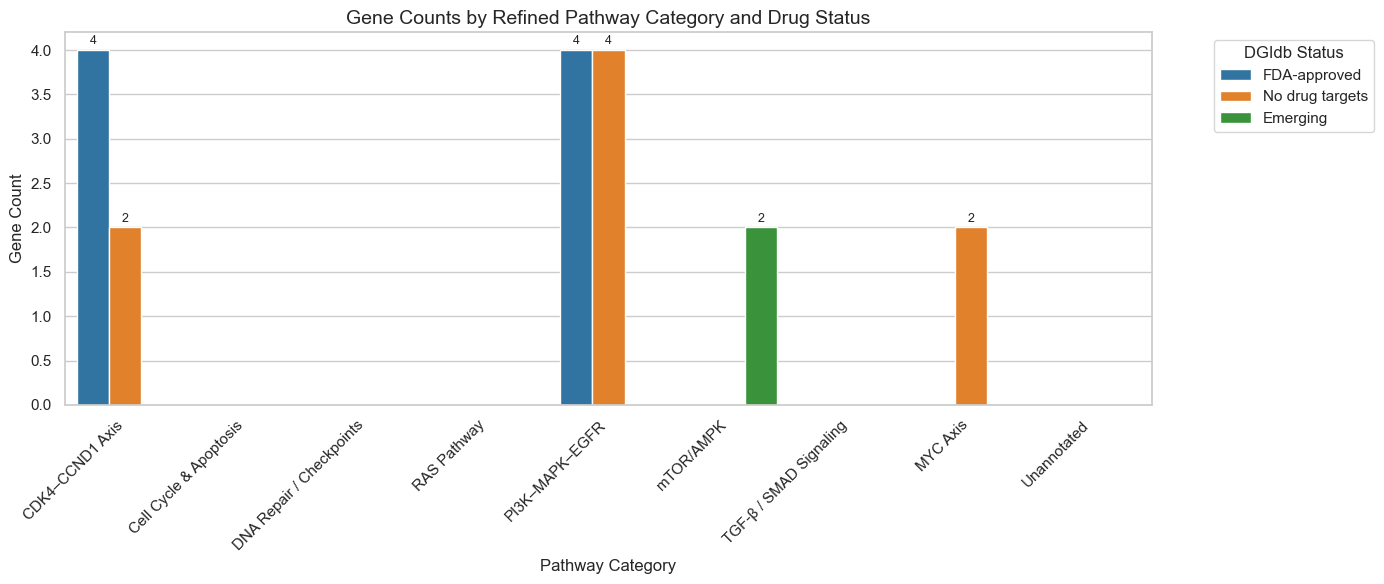

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
#df = pd.read_csv("final_master_gene_table_24July.csv")
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table_24July.csv")

# Strip column names just in case
df.columns = df.columns.str.strip()

# Ensure column exists
assert "Pathway Category" in df.columns, "Column 'Refined Pathway Category' not found!"

# Drop any rows with missing pathway
df = df[~df["Pathway Category"].isna()]

# Simplify/standardize DGIdb statuses
df["DGIdb Status"] = df["DGIdb Status"].replace({
    "Unknown": "No drug targets",
    "null": "No drug targets",
    "Not Targeted": "No drug targets",
    pd.NA: "No drug targets",
    None: "No drug targets"
})
df["DGIdb Status"] = df["DGIdb Status"].fillna("No drug targets")

# Group by Refined Pathway Category × Drug Status
grouped = df.groupby(["Pathway Category", "DGIdb Status"]).size().reset_index(name="Gene Count")

# Optional: Custom order for pathway categories
custom_order = [
    "CDK4–CCND1 Axis",
    "Cell Cycle & Apoptosis",
    "DNA Repair / Checkpoints",
    "RAS Pathway",
    "PI3K–MAPK–EGFR",
    "mTOR/AMPK",
    "TGF-β / SMAD Signaling",  # or "SMAD/TGF-β" if that’s what your data uses
    "MYC Axis",
    "Unannotated"
]

# Enforce ordering for x-axis
grouped["Pathway Category"] = pd.Categorical(
    grouped["Pathway Category"],
    categories=custom_order,
    ordered=True
)
grouped = grouped.sort_values("Pathway Category")

# Plot
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

bar = sns.barplot(
    data=grouped,
    x="Pathway Category",
    y="Gene Count",
    hue="DGIdb Status",
    palette="tab10"
)

# Add counts above bars
for container in bar.containers:
    bar.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

# Rotate x labels
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, ha='right')

# Titles and labels
plt.title("Gene Counts by Refined Pathway Category and Drug Status", fontsize=14)
plt.xlabel("Pathway Category")
plt.ylabel("Gene Count")

# Legend placement
plt.legend(title="DGIdb Status", bbox_to_anchor=(1.05, 1), loc="upper left")

# Tight layout and save
plt.tight_layout()
plt.savefig("gene_counts_by_pathway_and_drugstatus.png", dpi=300, bbox_inches='tight')
plt.show()


In [32]:
df.head(5)

,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category
0,WT1,GSE161529,1.302410e-46,3.432435,0.001784,No drug targets,False,Other
1,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,FDA-approved,True,Other
2,MET,GSE161529,0.000000e+00,3.249633,0.127505,No drug targets,False,Other
3,CDKN2A,GSE161529,0.000000e+00,3.184546,0.404804,No drug targets,False,Other
4,EGFR,GSE161529,0.000000e+00,3.021959,0.151644,FDA-approved,True,PI3K–MAPK–EGFR


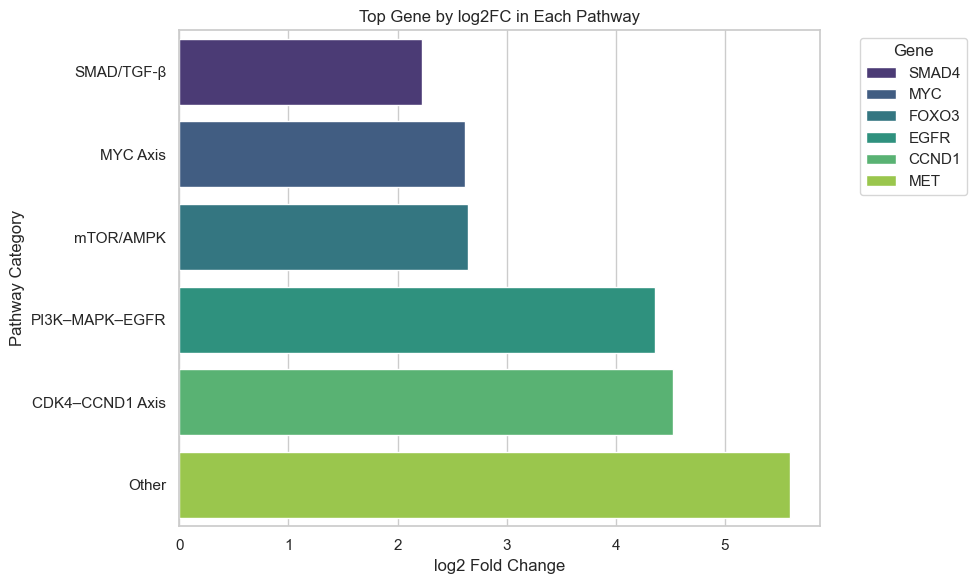

In [33]:
## Top Gene per Pathway by log2FC
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the annotated DE genes CSV
#df = pd.read_csv("combined_de_genes_annotated.csv")

# Filter out any rows with missing pathway info (optional)
df = df[df["Pathway Category"].notna()]

# For clarity, only keep one entry per gene per dataset (take max log2_fc if duplicate)
df_unique = df.sort_values("log2FC", ascending=False).drop_duplicates(subset=["Gene", "Pathway Category"])

# Get the top gene (by log2_fc) in each pathway
top_genes = df_unique.loc[df_unique.groupby("Pathway Category")["log2FC"].idxmax()]

# Sort for better visualization
top_genes = top_genes.sort_values("log2FC", ascending=True)

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_genes,
    x="log2FC",
    y="Pathway Category",
    hue="Gene",
    dodge=False,
    palette="viridis"
)
plt.title("Top Gene by log2FC in Each Pathway")
plt.xlabel("log2 Fold Change")
plt.ylabel("Pathway Category")
plt.legend(title="Gene", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


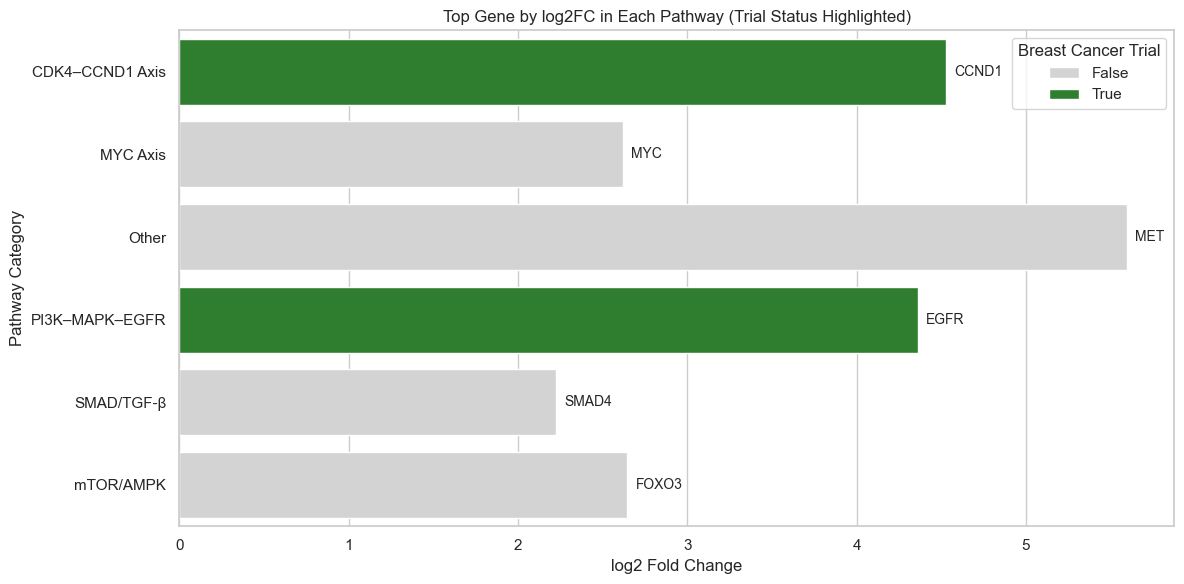

In [35]:
## Top gene per pathway by coloring the bars based on trial status.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the annotated dataset
#df = pd.read_csv("combined_de_genes_annotated.csv")

# Keep only relevant columns
#df_filtered = df[["Gene_upper", "log2_fc", "Pathway", "BreastCancerTrial"]].copy()

# Replace any missing pathways with 'Other'
df["Pathway Category"] = df["Pathway Category"].fillna("Other")

# Identify the top gene (highest log2_fc) in each pathway
top_genes = df.sort_values("log2FC", ascending=False).groupby("Pathway Category").first().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_genes,
    y="Pathway Category",
    x="log2FC",
    hue="Has Breast Cancer Trial",  # Adds color based on trial status
    dodge=False,  # Prevents bar separation
    palette={True: "forestgreen", False: "lightgray"}
)

# Add gene labels inside bars
for i, row in top_genes.iterrows():
    plt.text(
        row["log2FC"] + 0.05, i, row["Gene"],
        va='center', ha='left', fontsize=10
    )

plt.title("Top Gene by log2FC in Each Pathway (Trial Status Highlighted)")
plt.xlabel("log2 Fold Change")
plt.ylabel("Pathway Category")
plt.legend(title="Breast Cancer Trial")
plt.tight_layout()
plt.show()




/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_51679/2017344570.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



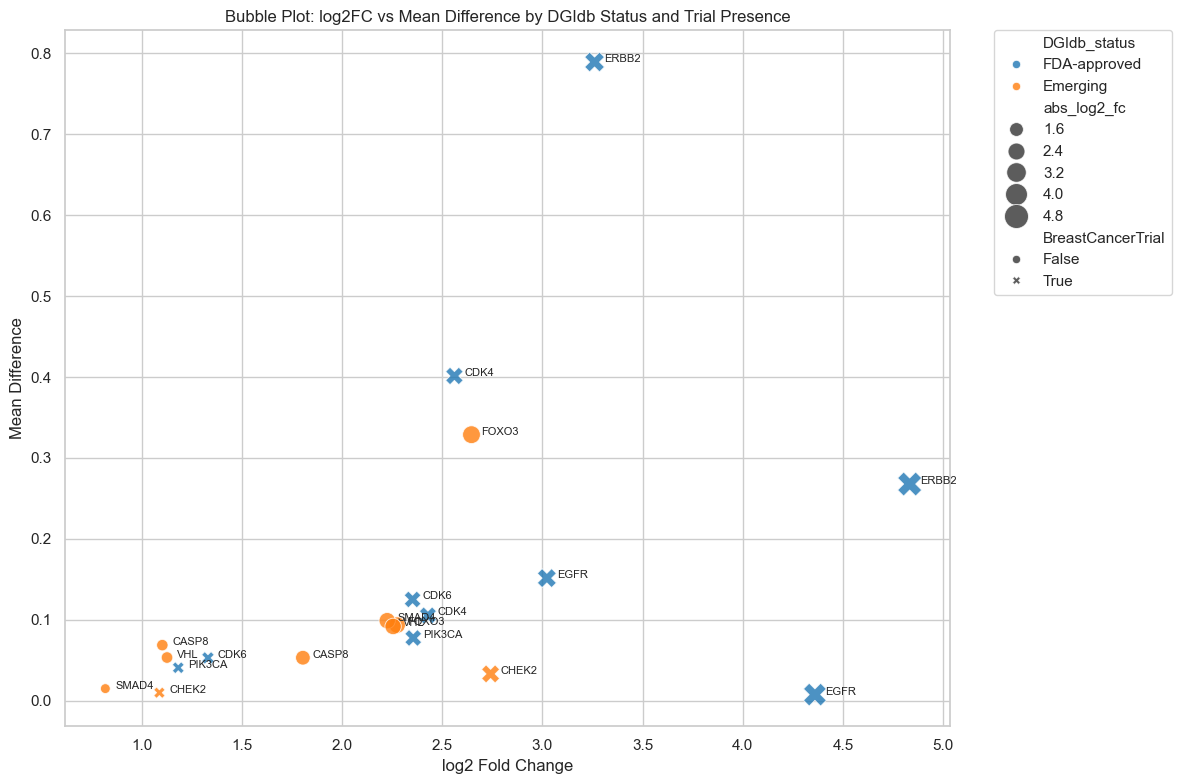

In [37]:
##  Here's the full Bubble Plot code where:
## x-axis = log2_fc
## y-axis = mean_diff
##color = DGIdb_status
##shape = BreastCancerTrial (True/False)
##size = absolute log2_fc

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the annotated dataset
df = pd.read_csv("../combined_de_genes_annotated.csv")

# Drop rows with missing values in relevant columns
plot_df = df.dropna(subset=["log2_fc", "mean_diff", "DGIdb_status", "BreastCancerTrial"])

# Optional: Add column for size (based on magnitude of log2_fc)
plot_df["abs_log2_fc"] = plot_df["log2_fc"].abs()

# Set figure size and style
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Create the bubble plot
bubble = sns.scatterplot(
    data=plot_df,
    x="log2_fc",
    y="mean_diff",
    hue="DGIdb_status",
    style="BreastCancerTrial",
    size="abs_log2_fc",
    sizes=(50, 300),  # Scale of bubbles
    alpha=0.8,
    palette="tab10"
)

# Annotate gene names
for i, row in plot_df.iterrows():
    plt.text(row["log2_fc"] + 0.05, row["mean_diff"], row["Gene_upper"], fontsize=8)

# Axis labels and title
plt.title("Bubble Plot: log2FC vs Mean Difference by DGIdb Status and Trial Presence")
plt.xlabel("log2 Fold Change")
plt.ylabel("Mean Difference")

# Legends
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()






In [38]:
import pandas as pd
import altair as alt

# Load data
#df = pd.read_csv("combined_de_genes_annotated.csv")

# Filter to GSE180286 only
df_180286 = df[df["Dataset"] == "GSE180286"].copy()

# Label only genes with strong expression change
df_180286["label"] = df_180286.apply(lambda x: x["Gene_upper"] if abs(x["log2_fc"]) > 2 else "", axis=1)

# BUBBLE PLOT
bubble_180286 = alt.Chart(df_180286).mark_point(filled=True).encode(
    x=alt.X("log2_fc", title="log2 Fold Change"),
    y=alt.Y("mean_diff", title="Mean Difference"),
    size=alt.Size("mean_diff", legend=alt.Legend(title="Mean Difference"), scale=alt.Scale(range=[60, 800])),  # Larger bubbles
    color=alt.Color("DGIdb_status", legend=alt.Legend(title="Drug Status")),
    shape=alt.Shape("BreastCancerTrial", legend=alt.Legend(title="Breast Cancer Trial")),
    tooltip=["Gene_upper", "log2_fc", "mean_diff", "DGIdb_status", "BreastCancerTrial"]
).properties(
    title="Bubble Plot (GSE180286): log2FC vs Mean Difference (Larger Dots, Annotated)",
    width=650,
    height=450
)

# TEXT LABELS: Only show high log2_fc
text_labels = alt.Chart(df_180286[df_180286["log2_fc"].abs() > 2]).mark_text(
    align="left",
    baseline="middle",
    dx=7,
    fontSize=13
).encode(
    x="log2_fc",
    y="mean_diff",
    text="Gene_upper"
)

# Combine and style
final_plot = (bubble_180286 + text_labels).configure_axis(grid=False).configure_view(stroke=None)
final_plot


alt.LayerChart(...)

In [39]:
# Replace null/NaN with "No drug target"
df_180286["DGIdb_status"] = df_180286["DGIdb_status"].fillna("No drug target")

# (Optional: make it categorical so legend ordering is clean)
df_180286["DGIdb_status"] = pd.Categorical(
    df_180286["DGIdb_status"],
    categories=["FDA-approved", "Emerging", "No drug target"]
)
bubble_180286 = alt.Chart(df_180286).mark_point(filled=True).encode(
    x=alt.X("log2_fc", title="log2 Fold Change"),
    y=alt.Y("mean_diff", title="Mean Difference"),
    size=alt.Size("mean_diff", legend=alt.Legend(title="Mean Difference"), scale=alt.Scale(range=[60, 800])),
    color=alt.Color("DGIdb_status", legend=alt.Legend(title="Drug Status")),
    shape=alt.Shape("BreastCancerTrial", legend=alt.Legend(title="Breast Cancer Trial")),
    tooltip=["Gene_upper", "log2_fc", "mean_diff", "DGIdb_status", "BreastCancerTrial"]
).properties(
    title="Bubble Plot (GSE180286): log2FC vs Mean Difference (Larger Dots, Annotated)",
    width=650,
    height=450
)

# TEXT LABELS: Only show high log2_fc
text_labels = alt.Chart(df_180286[df_180286["log2_fc"].abs() > 2]).mark_text(
    align="left",
    baseline="middle",
    dx=7,
    fontSize=13
).encode(
    x="log2_fc",
    y="mean_diff",
    text="Gene_upper"
)

# Combine and style
#final_plot = (bubble_180286 + text_labels).configure_axis(grid=False).configure_view(stroke=None)
final_plot = (bubble_180286 + text_labels).properties(
    width=750,  # Increase from default ~600
    height=500
).configure_axis(grid=False).configure_view(stroke=None)
final_plot



alt.LayerChart(...)

In [41]:
import pandas as pd

# Load the annotated file
df = pd.read_csv("../final_master_gene_table_24July.csv")

# Drop NA or null values in pathway category
df = df.dropna(subset=["Pathway Category"])

# Group and list genes in each category
grouped = df.groupby("Pathway Category")["Gene"].apply(list).reset_index()

# Display nicely
for _, row in grouped.iterrows():
    print(f"\n🔹 {row['Pathway Category']} ({len(row['Gene'])} genes):")
    print(", ".join(row["Gene"]))



🔹 CDK4–CCND1 Axis (6 genes):
CDK4, CDK6, CCND1, CCND1, CDK4, CDK6

🔹 MYC Axis (2 genes):
MYC, MYC

🔹 Other (58 genes):
WT1, ERBB2, MET, CDKN2A, CDKN1A, CHEK2, FGFR1, BRCA1, HRAS, SRC, NRAS, NF2, BRCA2, NF1, PTEN, STK11, VHL, ATR, TP53, MDM2, BAX, RB1, TSC2, NOTCH1, NTRK1, NTRK2, CASP8, FGFR2, BCL2, ATM, MET, ERBB2, FGFR2, CDKN2A, NTRK2, SRC, FGFR1, CDKN1A, BRCA1, NF1, HRAS, BRCA2, NRAS, MDM2, NF2, NOTCH1, TSC2, STK11, TP53, BAX, VHL, CASP8, CHEK2, RB1, PTEN, BCL2, ATR, ATM

🔹 PI3K–MAPK–EGFR (8 genes):
EGFR, AKT1, KRAS, PIK3CA, EGFR, AKT1, KRAS, PIK3CA

🔹 SMAD/TGF-β (2 genes):
SMAD4, SMAD4

🔹 mTOR/AMPK (2 genes):
FOXO3, FOXO3


In [42]:
## Step 1: Define gene-to-subgroup mapping
# Define gene lists for refined subgroups
refined_pathways = {
    "DNA Repair / Tumor Suppressors": [
        "BRCA1", "BRCA2", "TP53", "CHEK2", "ATM", "ATR", "RB1", "VHL", "NF2"
    ],
    "Apoptosis / Cell Death": [
        "BAX", "BCL2", "CASP8", "MDM2", "PTEN", "TSC2", "STK11"
    ],
    "RTKs / Growth Factor Signaling": [
        "ERBB2", "FGFR1", "FGFR2", "MET", "NTRK1", "NTRK2", "SRC", "WT1"
    ],
    "RAS–MAPK Axis": [
        "HRAS", "NRAS", "NF1", "CDKN2A", "CDKN1A", "NOTCH1"
    ]
}
## Step 2: Assign new refined pathway labels
# First copy the original column
df["Refined_Pathway_Category"] = df["Pathway Category"]

# Override 'Other' genes with refined labels
for subgroup, genes in refined_pathways.items():
    df.loc[
        (df["Pathway Category"] == "Other") & (df["Gene"].isin(genes)),
        "Refined_Pathway_Category"
    ] = subgroup

## Step 3: Inspect updated category distribution
    
# Show new categories and their gene counts
refined_grouped = df.groupby("Refined_Pathway_Category")["Gene"].apply(list).reset_index()

for _, row in refined_grouped.iterrows():
    print(f"\n🔸 {row['Refined_Pathway_Category']} ({len(row['Gene'])} genes):")
    print(", ".join(row["Gene"]))



🔸 Apoptosis / Cell Death (14 genes):
PTEN, STK11, MDM2, BAX, TSC2, CASP8, BCL2, MDM2, TSC2, STK11, BAX, CASP8, PTEN, BCL2

🔸 CDK4–CCND1 Axis (6 genes):
CDK4, CDK6, CCND1, CCND1, CDK4, CDK6

🔸 DNA Repair / Tumor Suppressors (18 genes):
CHEK2, BRCA1, NF2, BRCA2, VHL, ATR, TP53, RB1, ATM, BRCA1, BRCA2, NF2, TP53, VHL, CHEK2, RB1, ATR, ATM

🔸 MYC Axis (2 genes):
MYC, MYC

🔸 PI3K–MAPK–EGFR (8 genes):
EGFR, AKT1, KRAS, PIK3CA, EGFR, AKT1, KRAS, PIK3CA

🔸 RAS–MAPK Axis (12 genes):
CDKN2A, CDKN1A, HRAS, NRAS, NF1, NOTCH1, CDKN2A, CDKN1A, NF1, HRAS, NRAS, NOTCH1

🔸 RTKs / Growth Factor Signaling (14 genes):
WT1, ERBB2, MET, FGFR1, SRC, NTRK1, NTRK2, FGFR2, MET, ERBB2, FGFR2, NTRK2, SRC, FGFR1

🔸 SMAD/TGF-β (2 genes):
SMAD4, SMAD4

🔸 mTOR/AMPK (2 genes):
FOXO3, FOXO3


In [43]:
import pandas as pd

# Load your combined dataset
#df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop missing Gene or Dataset values
df = df.dropna(subset=["Gene", "Dataset"])

# Ensure gene names are strings (optional but safe)
df["Gene"] = df["Gene"].astype(str)

# Create a mapping of datasets per gene
gene_datasets = df.groupby("Gene")["Dataset"].unique().reset_index()

# Categorize genes
genes_both = gene_datasets[gene_datasets["Dataset"].apply(lambda x: set(x) == {"GSE161529", "GSE180286"})]["Gene"].tolist()
genes_161529_only = gene_datasets[gene_datasets["Dataset"].apply(lambda x: set(x) == {"GSE161529"})]["Gene"].tolist()
genes_180286_only = gene_datasets[gene_datasets["Dataset"].apply(lambda x: set(x) == {"GSE180286"})]["Gene"].tolist()

# Display results
print(f"🔁 Genes in both datasets ({len(genes_both)}):\n{genes_both}\n")
print(f"🧬 Genes unique to GSE161529 ({len(genes_161529_only)}):\n{genes_161529_only}\n")
print(f"🧬 Genes unique to GSE180286 ({len(genes_180286_only)}):\n{genes_180286_only}\n")

# Optional: save to file
pd.DataFrame({
    "Both": pd.Series(genes_both),
    "GSE161529 only": pd.Series(genes_161529_only),
    "GSE180286 only": pd.Series(genes_180286_only)
}).to_csv("gene_dataset_breakdown.csv", index=False)


🔁 Genes in both datasets (38):
['AKT1', 'ATM', 'ATR', 'BAX', 'BCL2', 'BRCA1', 'BRCA2', 'CASP8', 'CCND1', 'CDK4', 'CDK6', 'CDKN1A', 'CDKN2A', 'CHEK2', 'EGFR', 'ERBB2', 'FGFR1', 'FGFR2', 'FOXO3', 'HRAS', 'KRAS', 'MDM2', 'MET', 'MYC', 'NF1', 'NF2', 'NOTCH1', 'NRAS', 'NTRK2', 'PIK3CA', 'PTEN', 'RB1', 'SMAD4', 'SRC', 'STK11', 'TP53', 'TSC2', 'VHL']

🧬 Genes unique to GSE161529 (2):
['NTRK1', 'WT1']

🧬 Genes unique to GSE180286 (0):
[]



In [44]:
import pandas as pd

# Load the file
#df = pd.read_csv("final_master_gene_table_24July.csv")

# Identify gene groups
genes_161529 = set(df[df["Dataset"] == "GSE161529"]["Gene"])
genes_180286 = set(df[df["Dataset"] == "GSE180286"]["Gene"])

common_genes = genes_161529 & genes_180286
unique_161529 = genes_161529 - genes_180286
unique_180286 = genes_180286 - genes_161529

# Add helper column
df["Clinical_Status"] = df["DGIdb Status"].fillna("Unknown")

# Define function to get subsets
def extract_gene_info(gene_set, label):
    subset = df[df["Gene"].isin(gene_set)].copy()
    summary = subset.groupby(["Clinical_Status", "Has Breast Cancer Trial"])["Gene"].nunique().reset_index()
    summary.columns = ["DGIdb Status", "Has Breast Cancer Trial", "Gene Count"]
    print(f"\n🔹 {label}:")
    print(summary)
    return subset

# Apply to each group
common_df = extract_gene_info(common_genes, "Genes in BOTH datasets")
unique_161529_df = extract_gene_info(unique_161529, "Genes UNIQUE to GSE161529")
unique_180286_df = extract_gene_info(unique_180286, "Genes UNIQUE to GSE180286")



🔹 Genes in BOTH datasets:
   DGIdb Status  Has Breast Cancer Trial  Gene Count
0      Emerging                    False           4
1      Emerging                     True           1
2  FDA-approved                     True           5
3  Not Targeted                    False          27
4  Not Targeted                     True           1

🔹 Genes UNIQUE to GSE161529:
   DGIdb Status  Has Breast Cancer Trial  Gene Count
0  Not Targeted                    False           2

🔹 Genes UNIQUE to GSE180286:
Empty DataFrame
Columns: [DGIdb Status, Has Breast Cancer Trial, Gene Count]
Index: []


In [45]:
## Show Gene Names in Each Clinical Relevance Group per Dataset
# Helper function to group and list gene names
def list_genes_by_category(subset_df, label):
    grouped = (
        subset_df
        .groupby(["Clinical_Status", "Has Breast Cancer Trial"])["Gene"]
        .apply(lambda genes: sorted(genes.unique().tolist()))
        .reset_index()
    )
    print(f"\n🔹 {label}")
    for _, row in grouped.iterrows():
        status = row["Clinical_Status"]
        trial = "Yes" if row["Has Breast Cancer Trial"] else "No"
        genes = row["Gene"]
        print(f"  • {status}, Breast Cancer Trial: {trial} ({len(genes)} genes)")
        print("    " + ", ".join(genes))
    return grouped

# Show detailed gene lists for each group
common_grouped = list_genes_by_category(common_df, "Genes in BOTH datasets")
unique161529_grouped = list_genes_by_category(unique_161529_df, "Genes UNIQUE to GSE161529")
unique180286_grouped = list_genes_by_category(unique_180286_df, "Genes UNIQUE to GSE180286")



🔹 Genes in BOTH datasets
  • Emerging, Breast Cancer Trial: No (4 genes)
    CASP8, FOXO3, SMAD4, VHL
  • Emerging, Breast Cancer Trial: Yes (1 genes)
    CHEK2
  • FDA-approved, Breast Cancer Trial: Yes (5 genes)
    CDK4, CDK6, EGFR, ERBB2, PIK3CA
  • Not Targeted, Breast Cancer Trial: No (27 genes)
    AKT1, ATM, ATR, BAX, BCL2, BRCA1, BRCA2, CDKN1A, CDKN2A, FGFR1, FGFR2, HRAS, KRAS, MDM2, MET, MYC, NF1, NF2, NOTCH1, NRAS, NTRK2, PTEN, RB1, SRC, STK11, TP53, TSC2
  • Not Targeted, Breast Cancer Trial: Yes (1 genes)
    CCND1

🔹 Genes UNIQUE to GSE161529
  • Not Targeted, Breast Cancer Trial: No (2 genes)
    NTRK1, WT1

🔹 Genes UNIQUE to GSE180286


In [46]:
import pandas as pd
import plotly.graph_objects as go

# Load your data
#df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop missing or ambiguous entries
df = df.dropna(subset=["Gene", "Dataset", "DGIdb Status", "Has Breast Cancer Trial"])

# Convert boolean to string for Sankey compatibility
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Define all node categories in order
all_nodes = (
    list(df["Dataset"].unique()) +
    list(df["DGIdb Status"].unique()) +
    list(df["Has Breast Cancer Trial"].unique())
)

# Create node index map
node_map = {name: i for i, name in enumerate(all_nodes)}

# First level: Dataset → DGIdb Status
df["src1"] = df["Dataset"].map(node_map)
df["tgt1"] = df["DGIdb Status"].map(node_map)

# Second level: DGIdb Status → Trial Status
df["src2"] = df["DGIdb Status"].map(node_map)
df["tgt2"] = df["Has Breast Cancer Trial"].map(node_map)

# Count gene flows
links1 = df.groupby(["src1", "tgt1"]).size().reset_index(name="count")
links2 = df.groupby(["src2", "tgt2"]).size().reset_index(name="count")

# Combine all links
sources = pd.concat([links1["src1"], links2["src2"]])
targets = pd.concat([links1["tgt1"], links2["tgt2"]])
values = pd.concat([links1["count"], links2["count"]])

# Build Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
)])

fig.update_layout(title_text="Gene Flow: Dataset → DGIdb Status → Breast Cancer Trial", font_size=12)
fig.show()


In [84]:
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv("final_master_gene_table_24July.csv")

# Clean and drop missing
df = df.dropna(subset=["DGIdb Status", "Has Breast Cancer Trial", "Pathway Category"])

# Define tiers: Dataset → DGIdb Status → Pathway Category → Trial Status
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Unique labels
labels = list(pd.unique(
    df["Dataset"].tolist()
    + df["DGIdb Status"].tolist()
    + df["Pathway Category"].tolist()
    + df["Trial Status"].tolist()
))

# Label → Index mapping
label_to_index = {label: i for i, label in enumerate(labels)}

# Color mapping for DGIdb Status
color_map = {
    "FDA-approved": "rgba(0, 128, 0, 0.4)",  # green
    "Emerging": "rgba(255, 165, 0, 0.4)",    # orange
    "Not Targeted": "rgba(128, 128, 128, 0.4)"  # gray
}

# Build links with color and count
sources = []
targets = []
values = []
colors = []

# From Dataset → DGIdb Status
for (dataset, status), group in df.groupby(["Dataset", "DGIdb Status"]):
    sources.append(label_to_index[dataset])
    targets.append(label_to_index[status])
    values.append(len(group))
    colors.append(color_map.get(status, "rgba(192,192,192,0.4)"))

# From DGIdb Status → Pathway Category
for (status, pathway), group in df.groupby(["DGIdb Status", "Pathway Category"]):
    sources.append(label_to_index[status])
    targets.append(label_to_index[pathway])
    values.append(len(group))
    colors.append(color_map.get(status, "rgba(192,192,192,0.4)"))

# From Pathway Category → Trial Status
for (pathway, trial), group in df.groupby(["Pathway Category", "Trial Status"]):
    sources.append(label_to_index[pathway])
    targets.append(label_to_index[trial])
    values.append(len(group))
    # inherit color from the DGIdb Status by tracing one row
    status = group["DGIdb Status"].iloc[0]
    colors.append(color_map.get(status, "rgba(192,192,192,0.4)"))

# Plot Sankey
fig = go.Figure(go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
))

fig.update_layout(title_text="Gene Flow: Dataset → DGIdb Status → Pathway → Trial", font_size=11)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/56483324.py:14: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



In [85]:
##  Updated Code with Gene Count Labels per Node
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv("final_master_gene_table_24July.csv")

# Step 1: Create gene count summaries for each level
dataset_counts = df["Dataset"].value_counts().to_dict()
dgidb_counts = df["DGIdb Status"].value_counts().to_dict()
pathway_counts = df["Pathway Category"].fillna("Other").value_counts().to_dict()
trial_counts = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"}).value_counts().to_dict()

# Step 2: Create label list with counts
dataset_labels = [f"{k} ({v})" for k, v in dataset_counts.items()]
dgidb_labels = [f"{k} ({v})" for k, v in dgidb_counts.items()]
pathway_labels = [f"{k} ({v})" for k, v in pathway_counts.items()]
trial_labels = [f"{k} ({v})" for k, v in trial_counts.items()]

all_labels = dataset_labels + dgidb_labels + pathway_labels + trial_labels

# Step 3: Mapping original values to new labels
label_map = {}
idx = 0

def add_labels_and_map(values):
    global idx
    output = []
    for v in values:
        if v not in label_map:
            label_map[v] = idx
            idx += 1
        output.append(label_map[v])
    return output

# Re-map each stage to integer index
df["Pathway Category"] = df["Pathway Category"].fillna("Other")
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Step 4: Build link flows
def make_links(source_col, target_col):
    temp = df.groupby([source_col, target_col]).size().reset_index(name="count")
    temp["source"] = add_labels_and_map(temp[source_col])
    temp["target"] = add_labels_and_map(temp[target_col])
    return temp[["source", "target", "count"]]

links1 = make_links("Dataset", "DGIdb Status")
links2 = make_links("DGIdb Status", "Pathway Category")
links3 = make_links("Pathway Category", "Trial Status")

# Combine all links
all_links = pd.concat([links1, links2, links3])

# Optional color scheme
color_map = {
    "Not Targeted": "gray",
    "Emerging": "orange",
    "FDA-approved": "green"
}

# Assign link colors based on DGIdb status (only from first transition)
all_links["color"] = all_links["source"].map(
    lambda i: next((color_map[k] for k, v in label_map.items() if v == i and k in color_map), "lightgray")
)

# Step 5: Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightblue"
    ),
    link=dict(
        source=all_links["source"],
        target=all_links["target"],
        value=all_links["count"],
        color=all_links["color"]
    )
)])

fig.update_layout(title_text="Gene Flow: Dataset → DGIdb Status → Pathway → Trial (with Gene Counts)", font_size=12)
fig.show()


In [86]:
import pandas as pd
import plotly.graph_objects as go

# Load the annotated gene table
df = pd.read_csv("final_master_gene_table_24July.csv")

# Step 1: Filter only genes that belong to 'Other' pathway
df_other = df[df["Pathway Category"] == "Other"].copy()

# Step 2: Optional: Remove duplicated (Gene, Dataset) entries
df_other = df_other.drop_duplicates(subset=["Gene", "Dataset"])

# Step 3: Count how many genes per DGIdb + Breast Cancer Trial + Gene
grouped = df_other.groupby(["DGIdb Status", "Has Breast Cancer Trial", "Gene"]).size().reset_index(name='Count')

# Step 4: Prepare Sankey nodes and links
nodes = []
node_map = {}

def add_node(label):
    if label not in node_map:
        node_map[label] = len(nodes)
        nodes.append(label)
    return node_map[label]

source = []
target = []
value = []

# From DGIdb → Gene → Trial status
for _, row in grouped.iterrows():
    dgi = f"{row['DGIdb Status']}"
    gene = row["Gene"]
    trial = "Trial: Yes" if row["Has Breast Cancer Trial"] else "Trial: No"

    dgi_node = add_node(dgi)
    gene_node = add_node(gene)
    trial_node = add_node(trial)

    # DGIdb → Gene
    source.append(dgi_node)
    target.append(gene_node)
    value.append(row["Count"])

    # Gene → Trial
    source.append(gene_node)
    target.append(trial_node)
    value.append(row["Count"])

# Step 5: Create Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,
        thickness=15,
        line=dict(color="black", width=0.3),
        label=nodes,
        color="lightgrey"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(100,100,100,0.4)"
    )
)])

fig.update_layout(title_text="Filtered Sankey: DGIdb → Gene → Trial (Only 'Other' Pathway)", font_size=11)
fig.show()


In [87]:
## Sankey: DGIdb → Gene → Trial
##With: Link colors based on log2FC (blue = low, red = high)
##Bold/green outline for FDA-approved or breast cancer trial genes (optional)

import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load dataset
df = pd.read_csv("final_master_gene_table_24July.csv")

# ✅ Filter for only "Other" pathway (you can change this)
df_path = df[df["Pathway Category"] == "Other"].copy()

# Normalize log2FC for color mapping
norm = mcolors.Normalize(vmin=df_path["log2FC"].min(), vmax=df_path["log2FC"].max())
cmap = cm.get_cmap("RdBu_r")  # Red = up, Blue = down

def fc_to_hex(val):
    rgba = cmap(norm(val))
    return mcolors.to_hex(rgba)

# Compute unique node names
dgidb_statuses = df_path["DGIdb Status"].unique().tolist()
genes = df_path["Gene"].tolist()
trial_status = df_path["Has Breast Cancer Trial"].map(lambda x: "Trial: Yes" if x else "Trial: No").tolist()

# All nodes
node_labels = dgidb_statuses + genes + list(set(trial_status))
node_indices = {label: i for i, label in enumerate(node_labels)}

# Colors for nodes: highlight FDA-approved or Trial: Yes
node_colors = []
for label in node_labels:
    if label in ["Trial: Yes", "Trial: No"]:
        node_colors.append("lightgray")
    elif label in genes:
        # green if FDA-approved or has trial
        is_fda = df_path[df_path["Gene"] == label]["DGIdb Status"].values[0] == "FDA-approved"
        has_trial = df_path[df_path["Gene"] == label]["Has Breast Cancer Trial"].values[0]
        if is_fda or has_trial:
            node_colors.append("lightgreen")
        else:
            node_colors.append("lightblue")
    else:
        node_colors.append("lightcoral" if label == "FDA-approved" else "lightsteelblue")

# Links: DGIdb → Gene → Trial
sources = []
targets = []
values = []
colors = []

for _, row in df_path.iterrows():
    dgidb = row["DGIdb Status"]
    gene = row["Gene"]
    trial = "Trial: Yes" if row["Has Breast Cancer Trial"] else "Trial: No"

    # DGIdb → Gene
    sources.append(node_indices[dgidb])
    targets.append(node_indices[gene])
    values.append(1)
    colors.append(fc_to_hex(row["log2FC"]))

    # Gene → Trial
    sources.append(node_indices[gene])
    targets.append(node_indices[trial])
    values.append(1)
    colors.append(fc_to_hex(row["log2FC"]))

# Plot Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
)])

fig.update_layout(title_text="Filtered Sankey: DGIdb → Gene → Trial (log2FC colored)", font_size=12)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/2710814894.py:19: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [92]:
import plotly.graph_objects as go
import pandas as pd

# Load your data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop missing categories
df = df.dropna(subset=["Pathway Category", "DGIdb Status", "Has Breast Cancer Trial"])

# Convert boolean to string for Sankey grouping
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Define the 3-tier path
df["source"] = df["Pathway Category"]
df["target1"] = df["DGIdb Status"]
df["target2"] = df["Has Breast Cancer Trial"]

# Create all label nodes
labels = pd.concat([df["source"], df["target1"], df["target2"]]).unique().tolist()
label_to_index = {label: i for i, label in enumerate(labels)}

# Links for Pathway ➝ DGIdb
df1 = df.groupby(["source", "target1"]).size().reset_index(name="value")
df1["source_id"] = df1["source"].map(label_to_index)
df1["target_id"] = df1["target1"].map(label_to_index)

# Links for DGIdb ➝ Trial
df2 = df.groupby(["target1", "target2"]).size().reset_index(name="value")
df2["source_id"] = df2["target1"].map(label_to_index)
df2["target_id"] = df2["target2"].map(label_to_index)

# Combine
all_links = pd.concat([df1, df2], ignore_index=True)

# Plot the Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=all_links["source_id"],
        target=all_links["target_id"],
        value=all_links["value"]
    )
)])

fig.update_layout(title_text="Pathway ➝ Target Status ➝ Trial Status", font_size=12)
fig.show()



In [93]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")
df = df.dropna(subset=["Pathway Category", "DGIdb Status", "Has Breast Cancer Trial", "log2FC"])

# Convert boolean for readability
df["Has Breast Cancer Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Define tiers
df["source"] = df["Pathway Category"]
df["target1"] = df["DGIdb Status"]
df["target2"] = df["Has Breast Cancer Trial"]

# All node labels
labels = pd.concat([df["source"], df["target1"], df["target2"]]).unique().tolist()
label_to_index = {label: i for i, label in enumerate(labels)}

# 1st link set: source ➝ target1
df1 = df.groupby(["source", "target1"]).agg(
    value=("Gene", "count"),
    log2fc_mean=("log2FC", "mean")
).reset_index()
df1["source_id"] = df1["source"].map(label_to_index)
df1["target_id"] = df1["target1"].map(label_to_index)

# 2nd link set: target1 ➝ target2
df2 = df.groupby(["target1", "target2"]).agg(
    value=("Gene", "count"),
    log2fc_mean=("log2FC", "mean")
).reset_index()
df2["source_id"] = df2["target1"].map(label_to_index)
df2["target_id"] = df2["target2"].map(label_to_index)

# Combine links
links = pd.concat([df1, df2], ignore_index=True)

# Normalize log2fc_mean for colormap
norm = mcolors.Normalize(vmin=links["log2fc_mean"].min(), vmax=links["log2fc_mean"].max())
cmap = cm.get_cmap("viridis")
link_colors = [mcolors.to_hex(cmap(norm(val))) for val in links["log2fc_mean"]]

# Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightgray"
    ),
    link=dict(
        source=links["source_id"],
        target=links["target_id"],
        value=links["value"],
        color=link_colors
    )
)])

fig.update_layout(title_text="Sankey Diagram with log2FC Coloring", font_size=12)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/3806769510.py:44: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [94]:
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Load your final gene table
df = pd.read_csv("final_master_gene_table_24July.csv")

# Filter out rows with missing log2FC
df = df[df['log2FC'].notnull()]

# Optional: Keep only genes in known pathways
df = df[df['Pathway Category'] != 'Other']

# Create nodes (Pathway → DGIdb Status → Trial)
pathway = df['Pathway Category']
dgidb = df['DGIdb Status']
trial = df['Has Breast Cancer Trial'].map({True: 'Trial: Yes', False: 'Trial: No'})

# Define all nodes
all_nodes = pd.concat([pathway, dgidb, trial]).unique().tolist()

# Map each node to a numeric index
node_map = {name: i for i, name in enumerate(all_nodes)}

# Create flows: Pathway → DGIdb
df['source1'] = df['Pathway Category'].map(node_map)
df['target1'] = df['DGIdb Status'].map(node_map)

# DGIdb → Trial
df['source2'] = df['DGIdb Status'].map(node_map)
df['target2'] = df['Has Breast Cancer Trial'].map({True: 'Trial: Yes', False: 'Trial: No'}).map(node_map)

# Normalize log2FC for colormap
norm = mcolors.Normalize(vmin=df['log2FC'].min(), vmax=df['log2FC'].max())
cmap = cm.get_cmap('coolwarm')  # Red–Blue
colors = df['log2FC'].apply(lambda x: mcolors.to_hex(cmap(norm(x))))

# Combine links
sources = df['source1'].tolist() + df['source2'].tolist()
targets = df['target1'].tolist() + df['target2'].tolist()
values = [1]*len(sources)  # Each gene contributes equally
link_colors = colors.tolist() + colors.tolist()

# Create Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=20,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    )
)])

fig.update_layout(title_text="Sankey Diagram with log2FC Coloring (coolwarm)", font_size=12)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/392841249.py:37: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [100]:
import pandas as pd
import plotly.graph_objects as go

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")

# Drop rows with missing values in any key category
df = df.dropna(subset=["DGIdb Status", "Gene", "Has Breast Cancer Trial", "Pathway Category"])

# Step 1: Create label list for all 4 columns
sources = df["DGIdb Status"].unique().tolist()
genes = df["Gene"].unique().tolist()
trials = ["Trial: Yes", "Trial: No"]
pathways = df["Pathway Category"].unique().tolist()

labels = sources + genes + trials + pathways

# Helper to map labels to indices
label_to_index = {label: i for i, label in enumerate(labels)}

# Step 2: Create all links
def make_links(from_col, to_col):
    grouped = df.groupby([from_col, to_col]).size().reset_index(name='count')
    return grouped[from_col].map(label_to_index), grouped[to_col].map(label_to_index), grouped['count']

# Links: DGIdb → Gene
s1, t1, v1 = make_links("DGIdb Status", "Gene")

# Links: Gene → Trial
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})
s2, t2, v2 = make_links("Gene", "Trial Status")

# Links: Trial → Pathway
s3, t3, v3 = make_links("Trial Status", "Pathway Category")

# Combine all
source = pd.concat([s1, s2, s3])
target = pd.concat([t1, t2, t3])
value = pd.concat([v1, v2, v3])

# Step 3: Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="Gene Flow: DGIdb → Gene → Trial → Pathway (All Genes)",
    font_size=12
)
fig.show()



In [104]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Load data
df = pd.read_csv("final_master_gene_table_24July.csv")
df = df.dropna(subset=["DGIdb Status", "Gene", "Has Breast Cancer Trial", "Pathway Category", "log2FC"])

# Map trial status to string
df["Trial Status"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Step 1: Define node labels
sources = df["DGIdb Status"].unique().tolist()
genes = df["Gene"].unique().tolist()
trials = ["Trial: Yes", "Trial: No"]
pathways = df["Pathway Category"].unique().tolist()

labels = sources + genes + trials + pathways
label_to_index = {label: i for i, label in enumerate(labels)}

# Step 2: Prepare links
def make_links(from_col, to_col, val_col="count", use_logfc=False):
    if use_logfc:
        grouped = df.groupby([from_col, to_col])[val_col].mean().reset_index()
        grouped["count"] = 1  # for equal weight
    else:
        grouped = df.groupby([from_col, to_col]).size().reset_index(name="count")
        grouped[val_col] = 0  # dummy

    return (
        grouped[from_col].map(label_to_index),
        grouped[to_col].map(label_to_index),
        grouped["count"],
        grouped[val_col] if use_logfc else None
    )

# 1. DGIdb → Gene (no color)
s1, t1, v1, _ = make_links("DGIdb Status", "Gene")

# 2. Gene → Trial (with log2FC color)
gene_trial_df = df.groupby(["Gene", "Trial Status"]).agg({
    "log2FC": "mean",
    "Gene": "count"
}).rename(columns={"Gene": "count"}).reset_index()

s2 = gene_trial_df["Gene"].map(label_to_index)
t2 = gene_trial_df["Trial Status"].map(label_to_index)
v2 = gene_trial_df["count"]
log2fc_values = gene_trial_df["log2FC"]

# Map log2FC to color using coolwarm
norm = mcolors.Normalize(vmin=log2fc_values.min(), vmax=log2fc_values.max())
cmap = cm.get_cmap('coolwarm')
link_colors = ["rgba" + str(cmap(norm(val), bytes=True)) for val in log2fc_values]

# 3. Trial → Pathway (no color)
s3, t3, v3, _ = make_links("Trial Status", "Pathway Category")

# Combine all
source = pd.concat([s1, s2, s3])
target = pd.concat([t1, t2, t3])
value = pd.concat([v1, v2, v3])
color_links = (["lightgray"] * len(s1)) + link_colors + (["lightgray"] * len(s3))

# Step 3: Plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color="lightblue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=color_links
    )
)])

# fig.update_layout(
#     title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
#     font_size=11
# )
fig.update_layout(
    font=dict(
        size=11  # Label font size (you can set to 10 or 12 as needed)
    ),
    title=dict(
        text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
        font=dict(size=16),  # Title font size
        x=0.5  # Center the title
    ),
    height=600,
    margin=dict(l=20, r=20, t=60, b=20)
)
fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_27345/3874138190.py:54: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



In [1]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load your annotated DE file
#df = pd.read_csv("combined_de_genes_annotated.csv")
df = pd.read_csv("../combined_de_genes_annotated.csv")

# Fill NA where appropriate
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted")
df["Pathway"] = df["Pathway"].fillna("Unknown")
df["TrialStatus"] = df["BreastCancerTrial"].map({True: "Trial: Yes", False: "Trial: No"})

# Normalize log2 fold change for color gradient
norm = plt.Normalize(df["log2_fc"].min(), df["log2_fc"].max())
cmap = plt.get_cmap("coolwarm")
colors = [mcolors.to_hex(cmap(norm(x))) for x in df["log2_fc"]]

# Define all unique nodes
dgidb_nodes = df["DGIdb_status"].unique().tolist()
gene_nodes = df["Gene_upper"].unique().tolist()
trial_nodes = df["TrialStatus"].unique().tolist()
pathway_nodes = df["Pathway"].unique().tolist()

# Combine all labels
all_labels = dgidb_nodes + gene_nodes + trial_nodes + pathway_nodes
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Links: DGIdb → Gene
source_dgidb = df["DGIdb_status"].map(label_to_index)
target_gene = df["Gene_upper"].map(label_to_index)
color_gene = colors

# Links: Gene → Trial
source_gene = df["Gene_upper"].map(label_to_index)
target_trial = df["TrialStatus"].map(label_to_index)

# Links: Trial → Pathway
source_trial = df["TrialStatus"].map(label_to_index)
target_pathway = df["Pathway"].map(label_to_index)

# Combine all sources and targets
source_all = pd.concat([source_dgidb, source_gene, source_trial])
target_all = pd.concat([target_gene, target_trial, target_pathway])

# Colors: log2FC for first link, neutral for others
color_all = color_gene + ["#AAAAAA"] * len(source_gene) + ["#BBBBBB"] * len(source_trial)

# Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all
    )
)])

fig.update_layout(
    title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=10,
    title_font_size=16
)
from plotly.subplots import make_subplots

# Add color explanation as a dummy scatter plot for legend
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Upregulated (↑ log2FC)'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='Downregulated (↓ log2FC)'
))

# Optional: increase legend font size or move it
fig.update_layout(
    legend=dict(
        title="Color Legend",
        font=dict(size=12),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0
    )
)


fig.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as go

# Load data
df = pd.read_csv("../combined_de_genes_annotated.csv")

# Handle missing values
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted")
df["Pathway"] = df["Pathway"].fillna("Unknown")
df["TrialStatus"] = df["BreastCancerTrial"].map({True: "Trial: Yes", False: "Trial: No"})

# Normalize log2 fold change for color gradient
norm = plt.Normalize(df["log2_fc"].min(), df["log2_fc"].max())
cmap = plt.get_cmap("coolwarm")
color_gene_links = [mcolors.to_hex(cmap(norm(x))) for x in df["log2_fc"]]

# Define all unique nodes
dgidb_nodes = df["DGIdb_status"].unique().tolist()
gene_nodes = df["Gene_upper"].unique().tolist()
trial_nodes = df["TrialStatus"].unique().tolist()
pathway_nodes = df["Pathway"].unique().tolist()

# Build node list and mapping
all_labels = dgidb_nodes + gene_nodes + trial_nodes + pathway_nodes
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Link 1: DGIdb → Gene
source_dgidb = df["DGIdb_status"].map(label_to_index)
target_gene = df["Gene_upper"].map(label_to_index)

# Link 2: Gene → Trial
source_gene = df["Gene_upper"].map(label_to_index)
target_trial = df["TrialStatus"].map(label_to_index)

# Link 3: Trial → Pathway
source_trial = df["TrialStatus"].map(label_to_index)
target_pathway = df["Pathway"].map(label_to_index)

# Define colors for Gene → Trial links
trial_color_map = {"Trial: Yes": "#E41A1C", "Trial: No": "#999999"}
color_gene_trial_links = df["TrialStatus"].map(trial_color_map).tolist()

# Define colors for Trial → Pathway links using a Seaborn palette
pathway_palette = sns.color_palette("Set2", len(pathway_nodes)).as_hex()
pathway_color_map = dict(zip(pathway_nodes, pathway_palette))
color_trial_pathway_links = df["Pathway"].map(pathway_color_map).tolist()

# Combine all sources and targets
source_all = pd.concat([source_dgidb, source_gene, source_trial])
target_all = pd.concat([target_gene, target_trial, target_pathway])

# Combine all link colors
color_all = color_gene_links + color_gene_trial_links + color_trial_pathway_links

# Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all
    )
)])

# Add color legend (static dummy traces)
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Upregulated (↑ log2FC)'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='Downregulated (↓ log2FC)'
))

# Layout and legend position
fig.update_layout(
    title_text="Sankey Diagram with log2FC + Trial + Pathway Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=10,
    title_font_size=16,
    legend=dict(
        title="Color Legend",
        font=dict(size=12),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0
    )
)

fig.show()


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as go

# Load data
df = pd.read_csv("../combined_de_genes_annotated.csv")

# Handle missing values
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted")
df["Pathway"] = df["Pathway"].fillna("Unknown")
df["TrialStatus"] = df["BreastCancerTrial"].map({True: "Trial: Yes", False: "Trial: No"})

# Reset index to ensure alignment in lists
df = df.reset_index(drop=True)

# Normalize log2 fold change for color gradient
norm = plt.Normalize(df["log2_fc"].min(), df["log2_fc"].max())
cmap = plt.get_cmap("coolwarm")
color_gene_links = [mcolors.to_hex(cmap(norm(x))) for x in df["log2_fc"]]

# Unique nodes
dgidb_nodes = df["DGIdb_status"].unique().tolist()
gene_nodes = df["Gene_upper"].unique().tolist()
trial_nodes = df["TrialStatus"].unique().tolist()
pathway_nodes = df["Pathway"].unique().tolist()

# Master node list and mapping
all_labels = dgidb_nodes + gene_nodes + trial_nodes + pathway_nodes
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Link 1: DGIdb → Gene
source_dgidb = df["DGIdb_status"].map(label_to_index)
target_gene = df["Gene_upper"].map(label_to_index)

# Link 2: Gene → Trial
source_gene = df["Gene_upper"].map(label_to_index)
target_trial = df["TrialStatus"].map(label_to_index)

# Link 3: Trial → Pathway
source_trial = df["TrialStatus"].map(label_to_index)
target_pathway = df["Pathway"].map(label_to_index)

# Color 2: Gene → Trial links
trial_color_map = {"Trial: Yes": "#E41A1C", "Trial: No": "#999999"}
color_gene_trial_links = df["TrialStatus"].map(trial_color_map).tolist()

# Color 3: Trial → Pathway links using seaborn palette
pathway_palette = sns.color_palette("Set2", len(pathway_nodes)).as_hex()
pathway_color_map = dict(zip(pathway_nodes, pathway_palette))
color_trial_pathway_links = df["Pathway"].map(pathway_color_map).tolist()

# Combine all sources and targets
source_all = pd.concat([source_dgidb, source_gene, source_trial], ignore_index=True)
target_all = pd.concat([target_gene, target_trial, target_pathway], ignore_index=True)

# Combine all colors
color_all = color_gene_links + color_gene_trial_links + color_trial_pathway_links

# Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all
    )
)])

# Add legend traces
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Upregulated (↑ log2FC)'
))
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='Downregulated (↓ log2FC)'
))

# Layout
fig.update_layout(
    title_text="Sankey Diagram with log2FC + Trial + Pathway Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=10,
    title_font_size=16,
    legend=dict(
        title="Color Legend",
        font=dict(size=12),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0
    )
)

fig.show()


In [47]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
#df = pd.read_csv("combined_de_genes_annotated.csv")
#df = pd.read_csv("../final_master_gene_table_24July.csv")

# Fill and clean categorical values
df["DGIdb_status"] = df["DGIdb Status"].fillna("Not Targeted").replace("None", "Not Targeted")
df["TrialStatus"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})
df["Pathway Category"] = df["Pathway Category"].fillna("Other")

# Define categorical order for cleaner plot
df["DGIdb Status"] = pd.Categorical(df["DGIdb Status"], categories=["Not Targeted", "Emerging", "FDA-approved"], ordered=True)
df["TrialStatus"] = pd.Categorical(df["TrialStatus"], categories=["Trial: No", "Trial: Yes"], ordered=True)

# Get unique labels for each stage
dgidb_labels = df["DGIdb Status"].unique().tolist()
gene_labels = df["Gene"].unique().tolist()
trial_labels = df["TrialStatus"].unique().tolist()
pathway_labels = df["Pathway Category"].unique().tolist()

# Combine all into one list for sankey nodes
all_labels = dgidb_labels + gene_labels + trial_labels + pathway_labels

# Helper: label to index
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Setup edges (source → target)
source_all, target_all, color_all = [], [], []

# Normalize log2FC for coloring
norm = plt.Normalize(df["log2FC"].min(), df["log2FC"].max())
cmap = plt.get_cmap("coolwarm")

# Add links for each gene from DGIdb → Gene → Trial → Pathway
for _, row in df.iterrows():
    gene = row["Gene"]
    logfc = row["log2FC"]
    trial = row["TrialStatus"]
    dgidb = row["DGIdb Status"]
    path = row["Pathway Category"]

    color = f'rgba{cmap(norm(logfc), bytes=True)}'

    # DGIdb → Gene
    source_all.append(label_to_index[dgidb])
    target_all.append(label_to_index[gene])
    color_all.append(color)

    # Gene → Trial
    source_all.append(label_to_index[gene])
    target_all.append(label_to_index[trial])
    color_all.append(color)

    # Trial → Pathway
    source_all.append(label_to_index[trial])
    target_all.append(label_to_index[path])
    color_all.append(color)

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all,
        customdata=df[["Gene", "log2FC", "TrialStatus", "DGIdb Status", "Pathway Category"]],
        hovertemplate=(
            "Gene: %{customdata[0]}<br>" +
            "log2FC: %{customdata[1]:.2f}<br>" +
            "Trial: %{customdata[2]}<br>" +
            "DGIdb: %{customdata[3]}<br>" +
            "Pathway Category: %{customdata[4]}<extra></extra>"
        )
    )
)])
from plotly.subplots import make_subplots

# Add color explanation as a dummy scatter plot for legend
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Upregulated (↑ log2FC)'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='Downregulated (↓ log2FC)'
))

# Optional: increase legend font size or move it
fig.update_layout(
    legend=dict(
        title="Color Legend",
        font=dict(size=12),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0
    )
)


# Layout improvements
fig.update_layout(
    title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=11,
    title_font_size=16
)

fig.show()


In [128]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize, to_hex

import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("combined_de_genes_annotated.csv")

# Fill and clean categorical values
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted").replace("None", "Not Targeted")
df["TrialStatus"] = df["BreastCancerTrial"].map({True: "Trial: Yes", False: "Trial: No"})
df["Pathway"] = df["Pathway"].fillna("Other")

# Define categorical order for cleaner plot
df["DGIdb_status"] = pd.Categorical(df["DGIdb_status"], categories=["Not Targeted", "Emerging", "FDA-approved"], ordered=True)
df["TrialStatus"] = pd.Categorical(df["TrialStatus"], categories=["Trial: No", "Trial: Yes"], ordered=True)

# Get unique labels for each stage
dgidb_labels = df["DGIdb_status"].unique().tolist()
gene_labels = df["Gene_upper"].unique().tolist()
trial_labels = df["TrialStatus"].unique().tolist()
pathway_labels = df["Pathway"].unique().tolist()

# Combine all into one list for sankey nodes
all_labels = dgidb_labels + gene_labels + trial_labels + pathway_labels

# Helper: label to index
label_to_index = {label: i for i, label in enumerate(all_labels)}

# Setup edges (source → target)
source_all, target_all, color_all = [], [], []

# Normalize log2FC for coloring
norm = plt.Normalize(-2, 2)  # Use symmetric range for balanced red-blue
cmap = plt.get_cmap("coolwarm")

# Add links for each gene from DGIdb → Gene → Trial → Pathway
for _, row in df.iterrows():
    gene = row["Gene_upper"]
    logfc = row["log2_fc"]
    trial = row["TrialStatus"]
    dgidb = row["DGIdb_status"]
    path = row["Pathway"]

    # Map log2FC to rgba color with alpha
    rgb = cmap(norm(logfc))[:3]
    rgba_scaled = tuple(int(255 * c) for c in rgb)
    color = f'rgba{rgba_scaled + (0.4,)}'  # Add alpha for transparency

    # DGIdb → Gene
    source_all.append(label_to_index[dgidb])
    target_all.append(label_to_index[gene])
    color_all.append(color)

    # Gene → Trial
    source_all.append(label_to_index[gene])
    target_all.append(label_to_index[trial])
    color_all.append(color)

    # Trial → Pathway
    source_all.append(label_to_index[trial])
    target_all.append(label_to_index[path])
    color_all.append(color)

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=all_labels,
        color="lightgray"
    ),
    link=dict(
        source=source_all,
        target=target_all,
        value=[1]*len(source_all),
        color=color_all,
        customdata=df[["Gene_upper", "log2_fc", "TrialStatus", "DGIdb_status", "Pathway"]],
        hovertemplate=(
            "Gene: %{customdata[0]}<br>" +
            "log2FC: %{customdata[1]:.2f}<br>" +
            "Trial: %{customdata[2]}<br>" +
            "DGIdb: %{customdata[3]}<br>" +
            "Pathway: %{customdata[4]}<extra></extra>"
        )
    )
)])

# Layout improvements
fig.update_layout(
    title_text="Sankey Diagram with log2FC Coloring: DGIdb → Gene → Trial → Pathway",
    font_size=11,
    title_font_size=16
)

fig.show()









In [7]:

import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../final_master_gene_table_24July.csv")

# Step 1: Filter to 'Other' pathway category
df_other = df[df["Pathway Category"] == "Other"].copy()

# Step 2: Drop duplicate Gene–Dataset entries
df_other = df_other.drop_duplicates(subset=["Gene", "Dataset"])

# Step 3: Group by DGIdb Status, Trial Status, Gene, log2FC
grouped = df_other.groupby(
    ["DGIdb Status", "Has Breast Cancer Trial", "Gene", "log2FC"]
).size().reset_index(name='Count')

# Step 4: Set up Sankey nodes
nodes = []
node_map = {}

def add_node(label):
    if label not in node_map:
        node_map[label] = len(nodes)
        nodes.append(label)
    return node_map[label]

source = []
target = []
value = []
colors = []

# Use a colormap to color by log2FC
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(df_other["log2FC"].min(), df_other["log2FC"].max())

for _, row in grouped.iterrows():
    dgi = row["DGIdb Status"] if pd.notna(row["DGIdb Status"]) else "Not Targeted"
    gene = row["Gene"]
    trial = "Trial: Yes" if row["Has Breast Cancer Trial"] else "Trial: No"
    logfc = row["log2FC"]
    count = row["Count"]

    rgba = cmap(norm(logfc))
    rgba_str = f'rgba({int(rgba[0]*255)}, {int(rgba[1]*255)}, {int(rgba[2]*255)}, 0.8)'

    dgi_node = add_node(dgi)
    gene_node = add_node(gene)
    trial_node = add_node(trial)

    # DGIdb → Gene
    source.append(dgi_node)
    target.append(gene_node)
    value.append(count)
    colors.append(rgba_str)

    # Gene → Trial
    source.append(gene_node)
    target.append(trial_node)
    value.append(count)
    colors.append(rgba_str)

# Step 5: Build the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=12,
        thickness=15,
        line=dict(color="black", width=0.4),
        label=nodes,
        color="lightgray"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors
    )
)])

fig.update_layout(
    title_text="Filtered Sankey Diagram (Other Pathway): DGIdb → Gene → Trial",
    font_size=11,
    title_font_size=16
)

fig.show()





In [48]:
## Updated block
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.graph_objects as go

# Load data
#df = pd.read_csv("../final_master_gene_table_24July.csv")

# Step 1: Filter to 'Other' pathway category
df_other = df[df["Pathway Category"] == "Other"].copy()

# Step 2: Drop duplicate Gene–Dataset entries
df_other = df_other.drop_duplicates(subset=["Gene", "Dataset"])

# Step 3: Group by DGIdb Status, Trial Status, Gene, log2FC
grouped = df_other.groupby(
    ["DGIdb Status", "Has Breast Cancer Trial", "Gene", "log2FC"]
).size().reset_index(name='Count')

# Step 4: Set up Sankey nodes
nodes = []
node_map = {}

def add_node(label):
    if label not in node_map:
        node_map[label] = len(nodes)
        nodes.append(label)
    return node_map[label]

source = []
target = []
value = []
colors = []

# Use a colormap to color by log2FC
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(df_other["log2FC"].min(), df_other["log2FC"].max())

for _, row in grouped.iterrows():
    dgi = row["DGIdb Status"] if pd.notna(row["DGIdb Status"]) else "Not Targeted"
    gene = row["Gene"]
    trial = "Trial: Yes" if row["Has Breast Cancer Trial"] else "Trial: No"
    logfc = row["log2FC"]
    count = row["Count"]

    rgba = cmap(norm(logfc))
    rgba_str = f'rgba({int(rgba[0]*255)}, {int(rgba[1]*255)}, {int(rgba[2]*255)}, 0.8)'

    dgi_node = add_node(dgi)
    gene_node = add_node(gene)
    trial_node = add_node(trial)

    # DGIdb → Gene
    source.append(dgi_node)
    target.append(gene_node)
    value.append(count)
    colors.append(rgba_str)

    # Gene → Trial
    source.append(gene_node)
    target.append(trial_node)
    value.append(count)
    colors.append(rgba_str)

# Step 5: Build the Sankey plot
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=12,
        thickness=15,
        line=dict(color="black", width=0.4),
        label=nodes,
        color="lightgray"
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors
    )
)])

# --- Add Upregulated / Downregulated Legend ---
fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Upregulated (↑ log2FC)'
))

fig.add_trace(go.Scatter(
    x=[None], y=[None],
    mode='markers',
    marker=dict(size=10, color='blue'),
    name='Downregulated (↓ log2FC)'
))

# Step 6: Update layout with title + legend
fig.update_layout(
    title_text="Filtered Sankey Diagram (Other Pathway): DGIdb → Gene → Trial",
    font_size=11,
    title_font_size=16,
    legend=dict(
        title="Color Legend",
        font=dict(size=12),
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="left",
        x=0
    )
)

fig.show()


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_51679/2778066659.py:17: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [49]:
## Bubble Plot: Pathway Category vs log2FC, Colored by DGIdb Status
import pandas as pd
import plotly.express as px

# Load data
#df = pd.read_csv("../final_master_gene_table_24July.csv")

# Optional: Filter for DE genes or remove NaNs
df = df.dropna(subset=["log2FC", "Pathway Category", "DGIdb Status"])

# Clean color categories
df["DGIdb Status"] = df["DGIdb Status"].replace({None: "Not-Targeted", "": "Not-Targeted"})

# Bubble plot
fig = px.scatter(
    df,
    x="Pathway Category",
    y="log2FC",
    color="DGIdb Status",
    size=abs(df["log2FC"]),
    hover_name="Gene",
    title="Bubble Plot: Pathway Category vs log2FC, Colored by DGIdb Status",
    labels={"log2FC": "log2 Fold Change"}
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()




In [50]:
# Show all genes currently in the 'Other' category
df = pd.read_csv("../final_master_gene_table_24July.csv")
df[df["Pathway Category"] == "Other"]["Gene"].unique()


array(['WT1', 'ERBB2', 'MET', 'CDKN2A', 'CDKN1A', 'CHEK2', 'FGFR1',
       'BRCA1', 'HRAS', 'SRC', 'NRAS', 'NF2', 'BRCA2', 'NF1', 'PTEN',
       'STK11', 'VHL', 'ATR', 'TP53', 'MDM2', 'BAX', 'RB1', 'TSC2',
       'NOTCH1', 'NTRK1', 'NTRK2', 'CASP8', 'FGFR2', 'BCL2', 'ATM'],
      dtype=object)

In [51]:
## Dividing Other into different categories
refined_pathway_map = {
    # DNA Repair & Checkpoint
    "BRCA1": "DNA Repair",
    "BRCA2": "DNA Repair",
    "ATM": "DNA Repair",
    "ATR": "DNA Repair",
    "CHEK2": "Cell Cycle Checkpoint",
    "TP53": "p53 Pathway",
    "MDM2": "p53 Pathway",
    "RB1": "Cell Cycle Checkpoint",

    # Cell Cycle Inhibitors / Tumor Suppressors
    "CDKN2A": "Cell Cycle Inhibitor",
    "CDKN1A": "Cell Cycle Inhibitor",
    "STK11": "Tumor Suppressor",
    "NF1": "Tumor Suppressor",
    "NF2": "Tumor Suppressor",
    "VHL": "Tumor Suppressor",
    "TSC2": "Tumor Suppressor",

    # Apoptosis
    "BAX": "Apoptosis",
    "BCL2": "Apoptosis",
    "CASP8": "Apoptosis",

    # Receptor Tyrosine Kinases / Signaling
    "ERBB2": "RTK Signaling",
    "MET": "RTK Signaling",
    "FGFR1": "RTK Signaling",
    "FGFR2": "RTK Signaling",
    "SRC": "Tyrosine Kinase",

    # RAS Family
    "HRAS": "RAS Pathway",
    "NRAS": "RAS Pathway",

    # Neurotrophic Signaling
    "NTRK1": "Neurotrophic",
    "NTRK2": "Neurotrophic",

    # Notch Signaling
    "NOTCH1": "Notch Signaling",

    # Misc
    "WT1": "Transcription Factor"
}

# Load the data
df = pd.read_csv("../final_master_gene_table_24July.csv")

# Filter only rows labeled as "Other"
df_other = df[df["Pathway Category"] == "Other"].copy()

# Map refined pathways
df_other["Refined Pathway"] = df_other["Gene"].map(refined_pathway_map)

# Optional: remove rows with no mapping (i.e., missing)
df_other = df_other.dropna(subset=["Refined Pathway"])
import plotly.express as px

# Group to get average log2FC and count per refined group
df_grouped = df_other.groupby(["Refined Pathway", "Gene", "DGIdb Status"]).agg({
    "log2FC": "mean",
    "Gene": "count"
}).rename(columns={"Gene": "GeneCount"}).reset_index()

# Plot
fig = px.scatter(
    df_grouped,
    x="Refined Pathway",
    y="log2FC",
    size="GeneCount",
    color="DGIdb Status",
    hover_name="Gene",
    title="Bubble Plot: Refined Pathways vs log2FC, Colored by DGIdb Status"
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()



In [52]:
## Group refined pathways into broader super-pathway categories (like "Genome Integrity", "Cell Signaling", etc.)
import pandas as pd
import plotly.express as px

# Load your dataframe
df = pd.read_csv("../final_master_gene_table_24July.csv")

# Fill missing DGIdb Status
df["DGIdb Status"] = df["DGIdb Status"].fillna("Not Targeted")

# Refined pathway mapping (already done previously)
refined_pathway_map = {
    "ATM": "DNA Repair",
    "ATR": "DNA Repair",
    "CHEK2": "Cell Cycle Checkpoint",
    "MDM2": "p53 Pathway",
    "TP53": "p53 Pathway",
    "RB1": "Cell Cycle Inhibitor",
    "CDKN1A": "Cell Cycle Inhibitor",
    "CDKN2A": "Cell Cycle Inhibitor",
    "BAX": "Apoptosis",
    "CASP8": "Apoptosis",
    "BCL2": "Apoptosis",
    "NF1": "RAS Pathway",
    "NF2": "Neurotrophic",
    "HRAS": "RAS Pathway",
    "NRAS": "RAS Pathway",
    "SRC": "RTK Signaling",
    "MET": "RTK Signaling",
    "FGFR1": "RTK Signaling",
    "FGFR2": "RTK Signaling",
    "NOTCH1": "Notch Signaling",
    "NTRK1": "Neurotrophic",
    "NTRK2": "Neurotrophic",
    "STK11": "Transcription Factor",
    "WT1": "Transcription Factor",
    "VHL": "mTOR Pathway",
    "PTEN": "mTOR Pathway",
    "ERBB2": "RTK Signaling"
}

# Apply refined pathway mapping
df["Refined Pathway"] = df["Gene"].map(refined_pathway_map).fillna(df["Pathway Category"])

# ✅ Super-pathway mapping
super_pathway_map = {
    "DNA Repair": "Genome Integrity",
    "p53 Pathway": "Genome Integrity",
    "Cell Cycle Checkpoint": "Genome Integrity",
    "Cell Cycle Inhibitor": "Genome Integrity",
    "Apoptosis": "Genome Integrity",
    
    "RTK Signaling": "Cell Signaling",
    "RAS Pathway": "Cell Signaling",
    "Notch Signaling": "Cell Signaling",
    "Neurotrophic": "Cell Signaling",

    "mTOR Pathway": "Metabolism & Growth",
    
    "Transcription Factor": "Gene Regulation",
    
    "Other": "Other"
}

# Map to Super Pathway
df["Super Pathway"] = df["Refined Pathway"].map(super_pathway_map).fillna("Other")

# Aggregate for plot
grouped = df.groupby(["Super Pathway", "DGIdb Status", "Gene"]).agg({
    "log2FC": "mean",
    "Gene": "count"
}).rename(columns={"Gene": "GeneCount"}).reset_index()

# Plot
fig = px.scatter(
    grouped,
    x="Super Pathway",
    y="log2FC",
    size="GeneCount",
    color="DGIdb Status",
    hover_name="Gene",
    title="Bubble Plot: Super-Pathways vs log2FC, Colored by DGIdb Status"
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()


In [53]:
## Bar Plot: Clinical Trial Presence vs DGIdb Status (Grouped by Dataset)
import pandas as pd
import plotly.express as px

# Load data
#df = pd.read_csv("final_master_gene_table_24July.csv")

# Clean/Fill DGIdb Status
#df["DGIdb Status"] = df["DGIdb Status"].fillna("Not-Targeted")

# Clean Trial column
df["Trial"] = df["Has Breast Cancer Trial"].map({True: "Trial: Yes", False: "Trial: No"})

# Group and count
plot_df = df.groupby(["Dataset", "DGIdb Status", "Trial"]).size().reset_index(name="Count")

# Bar plot
fig = px.bar(
    plot_df,
    x="DGIdb Status",
    y="Count",
    color="Trial",
    barmode="group",
    facet_col="Dataset",
    title="Bar Plot: Clinical Trial Presence vs DGIdb Status (Grouped by Dataset)"
)

fig.update_layout(title_font_size=16, font_size=11)
fig.show()


In [54]:
df.head(3)

,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,Refined Pathway,Super Pathway,Trial
0,WT1,GSE161529,1.302410e-46,3.432435,0.001784,Not Targeted,False,Other,Transcription Factor,Gene Regulation,Trial: No
1,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,FDA-approved,True,Other,RTK Signaling,Cell Signaling,Trial: Yes
2,MET,GSE161529,0.000000e+00,3.249633,0.127505,Not Targeted,False,Other,RTK Signaling,Cell Signaling,Trial: No


In [56]:
pip install xgboost


  Using cached xgboost-3.0.2-py3-none-macosx_10_15_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.2-py3-none-macosx_10_15_x86_64.whl (2.2 MB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_51679/1424452351.py:46: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



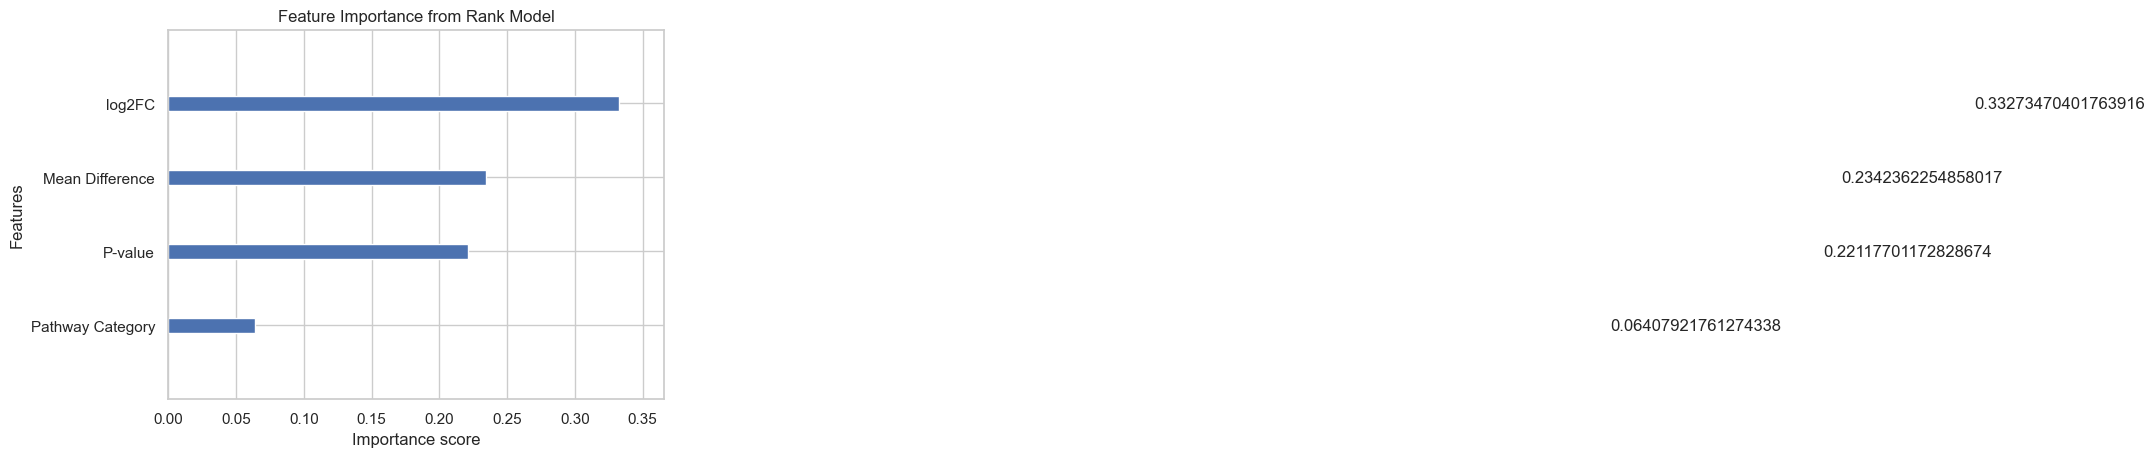

In [82]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load your data
#df = pd.read_csv("../final_master_gene_table_24July.csv")

# Step 1: Drop NA log2FC or Mean Difference
df = df.dropna(subset=["log2FC", "Mean Difference"])

X = df[["log2FC", "Mean Difference", "P-value", "Pathway Category"]].copy()
X["Pathway Category"] = LabelEncoder().fit_transform(X["Pathway Category"].astype(str))
# Step 2: Feature matrix
#X = df[["log2FC", "Mean Difference","P-value","Pathway Category"]].copy()
# Step 3: Target for ranking — can also try 'Has Breast Cancer Trial'
#y = df["log2FC"]  # or df["Mean Difference"], or a composite score
df["rank_target"] = (
    df["log2FC"].rank(pct=True) +
    df["Mean Difference"].rank(pct=True)
) / 2
y = df["rank_target"]
# Step 4: XGBoost DMatrix
X["Pathway Category"] = LabelEncoder().fit_transform(X["Pathway Category"])

# Define groups if ranking per dataset
group_sizes = df.groupby("Dataset").size().tolist()
dtrain = xgb.DMatrix(X, label=y)
dtrain.set_group(group_sizes)

# Ranker params
params = {
    "objective": "rank:pairwise",
    "eval_metric": "ndcg",
    "eta": 0.1,
    "max_depth": 3,
    "verbosity": 0
}

# Train rank model
rank_model = xgb.train(params, dtrain, num_boost_round=30)

# Plot importance
xgb.plot_importance(rank_model, importance_type='gain')
plt.title("Feature Importance from Rank Model")
plt.tight_layout()
plt.show()


In [83]:
df["Rank_Score"] = rank_model.predict(xgb.DMatrix(X))
df_sorted = df.sort_values("Rank_Score", ascending=False)

# Top 10 ranked oncogenes
print(df_sorted[["Gene", "log2FC", "Mean Difference", "Rank_Score"]].head(10))


      Gene    log2FC  Mean Difference  Rank_Score
1    ERBB2  3.260088         0.789027    0.989753
42   CCND1  4.525871         0.483840    0.983226
3   CDKN2A  3.184546         0.404804    0.969681
5   CDKN1A  2.916505         0.568516    0.953518
41   ERBB2  4.833174         0.267847    0.927284
10     MYC  2.618363         1.041190    0.880799
7    FGFR1  2.723209         0.369031    0.853281
8    FOXO3  2.645694         0.328789    0.800907
13    CDK4  2.560410         0.401301    0.748920
49  CDKN1A  3.365022         0.134859    0.748846


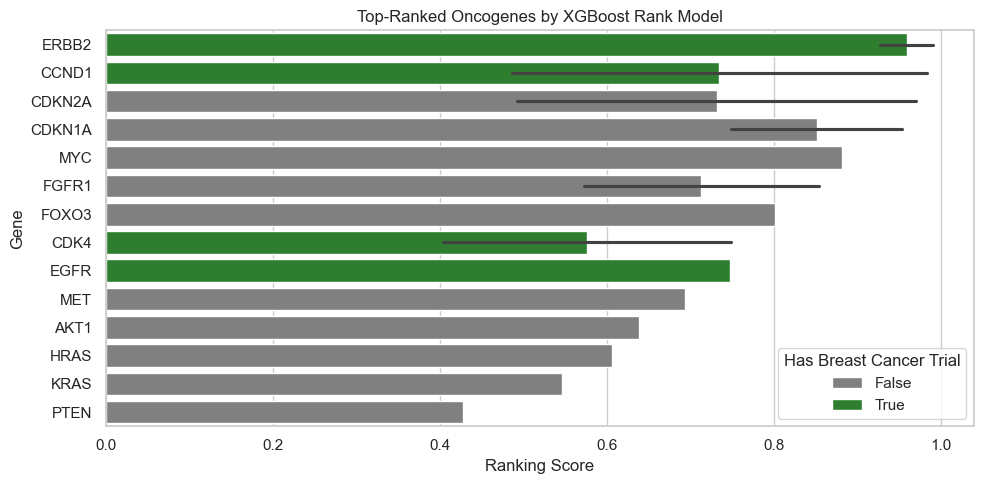

In [84]:
import seaborn as sns

top_genes = df_sorted.head(20)

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Rank_Score",
    y="Gene",
    data=top_genes,
    hue="Has Breast Cancer Trial",
    dodge=False,
    palette={True: "forestgreen", False: "gray"}
)
plt.xlabel("Ranking Score")
plt.title("Top-Ranked Oncogenes by XGBoost Rank Model")
plt.tight_layout()
plt.show()


In [85]:
pip install shap


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


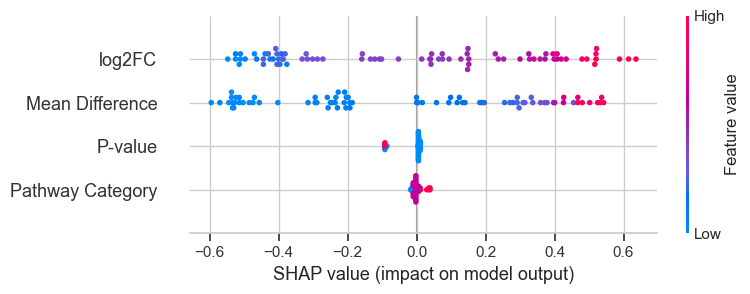

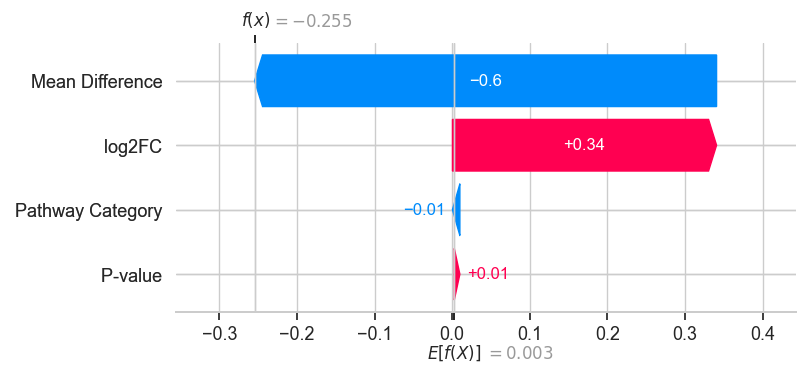

In [88]:
import shap
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Recreate the DMatrix
#dtrain = xgb.DMatrix(X, label=y, feature_names=X.columns)
dtrain = xgb.DMatrix(X, label=y, feature_names=X.columns.tolist())


# Step 1: Use TreeExplainer for Booster-based XGBoost
explainer = shap.TreeExplainer(rank_model)

# Step 2: Compute SHAP values using DataFrame X
shap_values = explainer.shap_values(X)

# Step 3: Beeswarm plot (summary plot)
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

# Optional: Waterfall plot for a specific gene
# Pick one row index (e.g. top-ranked gene)
i = 0  # or choose index of ERBB2, etc.
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], feature_names=X.columns, features=X.iloc[i])




In [89]:
num_total_genes = df["log2FC"].notna().sum()
print(f"Total genes with log2FC available: {num_total_genes}")

Total genes with log2FC available: 78


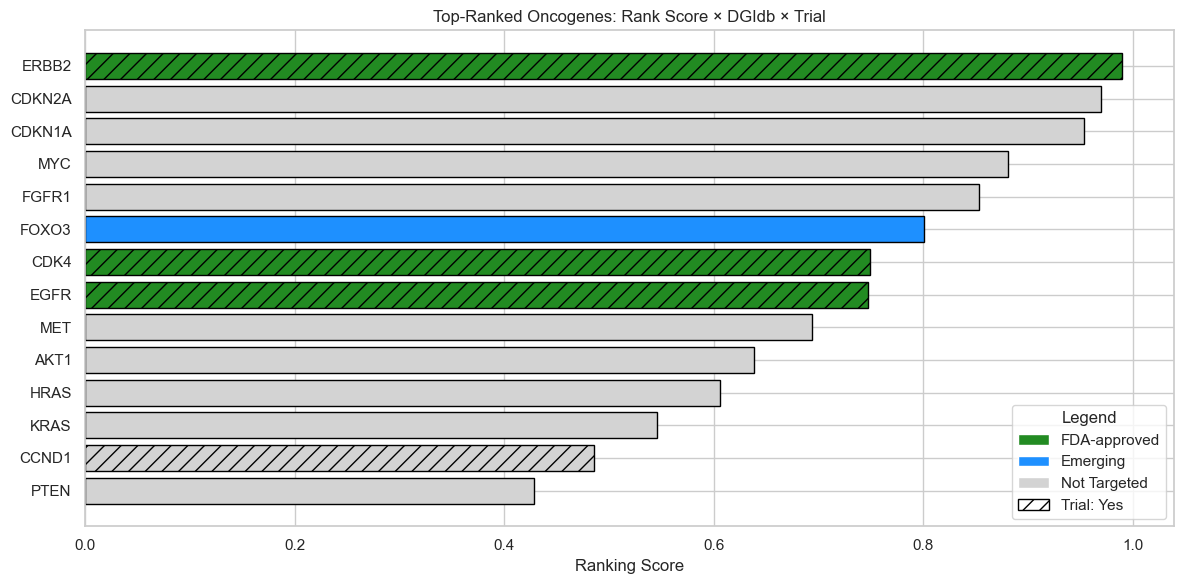

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Load your data
#df = pd.read_csv("../final_master_gene_table_24July.csv")
# Select top genes with Rank_Score (replace with your actual ranked list if needed)
top_genes = df[df["Gene"].isin([
    "ERBB2", "MET", "CCND1", "EGFR", "FGFR1", "CDKN2A", "CDKN1A","MYC", "HRAS",
    "FGFR1", "KRAS", "CDK4", "PTEN", "AKT1", "FOXO3"
])].copy()

# Remove duplicates and drop missing Rank_Score if any
top_genes = top_genes.drop_duplicates(subset="Gene")
top_genes = top_genes.dropna(subset=["Rank_Score"])

# Sort by Rank_Score
top_genes = top_genes.sort_values("Rank_Score", ascending=True)

# Define color mapping for DGIdb Status
color_map = {
    "FDA-approved": "forestgreen",
    "Emerging": "dodgerblue",
    "Not Targeted": "lightgray"
}

# Plot
plt.figure(figsize=(12, 6))
bars = []

for i, row in enumerate(top_genes.itertuples()):
    gene = row.Gene
    score = row.Rank_Score
    trial = row._7  # 'Has Breast Cancer Trial'
    status = row._6  # 'DGIdb Status'

    color = color_map.get(status, "lightgray")
    hatch = "//" if trial else ""

    bar = plt.barh(
        y=i,
        width=score,
        color=color,
        edgecolor="black",
        hatch=hatch
    )
    bars.append(bar)

# Axis setup
plt.yticks(range(len(top_genes)), top_genes["Gene"])
plt.xlabel("Ranking Score")
plt.title("Top-Ranked Oncogenes: Rank Score × DGIdb × Trial")

# Custom Legend
legend_patches = [
    mpatches.Patch(facecolor='forestgreen', label='FDA-approved'),
    mpatches.Patch(facecolor='dodgerblue', label='Emerging'),
    mpatches.Patch(facecolor='lightgray', label='Not Targeted'),
    mpatches.Patch(facecolor='white', edgecolor='black', hatch='//', label='Trial: Yes')
]
plt.legend(handles=legend_patches, title="Legend", loc="lower right")

plt.tight_layout()
plt.show()




In [101]:
import plotly.graph_objects as go
import pandas as pd
import pandas as pd
import plotly.graph_objects as go

# Manual dataset based on your earlier plot
data = [
    {"Gene": "ERBB2", "DGIdb": "FDA-approved", "Trial": "Yes"},
    {"Gene": "CDKN2A", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "CDKN1A", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "MYC", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "FGFR1", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "FOXO3", "DGIdb": "Emerging", "Trial": "No"},
    {"Gene": "CDK4", "DGIdb": "FDA-approved", "Trial": "Yes"},
    {"Gene": "EGFR", "DGIdb": "FDA-approved", "Trial": "Yes"},
    {"Gene": "MET", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "AKT1", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "HRAS", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "KRAS", "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "CCND1", "DGIdb": "Not Targeted", "Trial": "Yes"},
    {"Gene": "PTEN", "DGIdb": "Not Targeted", "Trial": "No"},
]

df = pd.DataFrame(data)

# Create unique labels (nodes): genes, DGIdb statuses, trial values
genes = df["Gene"].unique().tolist()
statuses = df["DGIdb"].unique().tolist()
trials = df["Trial"].unique().tolist()

labels = genes + statuses + trials
label_index = {label: idx for idx, label in enumerate(labels)}

# Build links: Gene → DGIdb
source1 = df["Gene"].map(label_index)
target1 = df["DGIdb"].map(label_index)
value1 = [1]*len(df)  # each gene contributes 1

# Build links: DGIdb → Trial
source2 = df["DGIdb"].map(label_index)
target2 = df["Trial"].map(label_index)
value2 = [df[df["DGIdb"] == dg]["Gene"].count() for dg in df["DGIdb"]]

# Combine both stages
sources = list(source1) + list(source2)
targets = list(target1) + list(target2)
values  = list(value1)  + list(value2)

# Plot Sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        label=labels,
        color="lightsteelblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="rgba(0,100,200,0.3)"
    )
))

fig.update_layout(title="Sankey Diagram: Gene → Drug Target Status → Clinical Trial", font_size=11)
fig.show()




In [122]:
import pandas as pd
import plotly.graph_objects as go

# Extended dataset with Pathway, Gene, RankScore, DGIdb, and Trial info
data = [
    {"Gene": "ERBB2", "Pathway": "RTK", "RankScore": 0.98, "DGIdb": "FDA-approved", "Trial": "Yes"},
    {"Gene": "CDKN2A", "Pathway": "Cell Cycle", "RankScore": 0.95, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "CDKN1A", "Pathway": "Cell Cycle", "RankScore": 0.94, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "MYC", "Pathway": "Transcription", "RankScore": 0.89, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "FGFR1", "Pathway": "RTK", "RankScore": 0.87, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "FOXO3", "Pathway": "Transcription", "RankScore": 0.80, "DGIdb": "Emerging", "Trial": "No"},
    {"Gene": "CDK4", "Pathway": "RTK", "RankScore": 0.78, "DGIdb": "FDA-approved", "Trial": "Yes"},
    {"Gene": "EGFR", "Pathway": "RTK", "RankScore": 0.77, "DGIdb": "FDA-approved", "Trial": "Yes"},
    {"Gene": "MET", "Pathway": "RTK", "RankScore": 0.69, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "AKT1", "Pathway": "PI3K:AKT", "RankScore": 0.65, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "HRAS", "Pathway": "MAPK", "RankScore": 0.62, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "KRAS", "Pathway": "MAPK", "RankScore": 0.58, "DGIdb": "Not Targeted", "Trial": "No"},
    {"Gene": "CCND1", "Pathway": "Cell Cycle", "RankScore": 0.46, "DGIdb": "Not Targeted", "Trial": "Yes"},
    {"Gene": "PTEN", "Pathway": "PI3K:AKT", "RankScore": 0.43, "DGIdb": "Not Targeted", "Trial": "No"},
]

df = pd.DataFrame(data).sort_values("RankScore", ascending=False)

# Build labels and index
pathways = df["Pathway"].unique().tolist()
genes = df["Gene"].tolist()
statuses = df["DGIdb"].unique().tolist()
trials = df["Trial"].unique().tolist()

labels = pathways + genes + statuses + trials
label_index = {label: idx for idx, label in enumerate(labels)}

# Build Sankey flows
sources, targets, values, colors = [], [], [], []

# Pathway → Gene
for _, row in df.iterrows():
    sources.append(label_index[row["Pathway"]])
    targets.append(label_index[row["Gene"]])
    values.append(1)
    colors.append("lightgray")

# Gene → DGIdb
for _, row in df.iterrows():
    sources.append(label_index[row["Gene"]])
    targets.append(label_index[row["DGIdb"]])
    values.append(1)
    if row["DGIdb"] == "FDA-approved":
        colors.append("green")
    elif row["DGIdb"] == "Emerging":
        colors.append("blue")
    else:
        colors.append("gray")

# DGIdb → Trial
for _, row in df.iterrows():
    sources.append(label_index[row["DGIdb"]])
    targets.append(label_index[row["Trial"]])
    values.append(1)
    colors.append("lightgray")

# Draw Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement="snap",
    node=dict(
        pad=20,
        thickness=24,
        line=dict(color="black", width=0.4),
        label=labels,
        color="lightgray",
        hovertemplate='%{label}'
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=colors
    )
)])

fig.update_layout(
    title="Sankey Flow: Pathway → Gene → Drug Target Status → Trial Presence",
    font=dict(size=13),
    height=950,
    width=1250
)

fig.show()








In [125]:
df = pd.DataFrame(data).sort_values("RankScore", ascending=False)
df.groupby(["Pathway", "DGIdb", "Trial"])["Gene"].nunique()


Pathway        DGIdb         Trial
Cell Cycle     Not Targeted  No       2
                             Yes      1
MAPK           Not Targeted  No       2
PI3K:AKT       Not Targeted  No       2
RTK            FDA-approved  Yes      3
               Not Targeted  No       2
Transcription  Emerging      No       1
               Not Targeted  No       1
Name: Gene, dtype: int64

In [2]:
import requests
import pandas as pd
from io import StringIO

# Step 1: Download DGIdb interactions TSV
url = "https://www.dgidb.org/data/latest/interactions.tsv"
response = requests.get(url)
if response.status_code != 200:
    raise Exception(f"❌ Download failed with status code {response.status_code}")


# Step 2: Load TSV data
df2 = pd.read_csv(StringIO(response.text), sep="\t")

# Step 3: Genes to check
genes_to_check = [
    "FGFR1", "MET", "EGFR", "CDK4", "ERBB2", "MYC", "CDKN2A", "CDKN1A",
    "FOXO3", "AKT1", "HRAS", "KRAS", "CCND1", "PTEN"
]

# Step 4: Filter interactions
filtered = df2[df2["gene_name"].isin(genes_to_check)]

# Step 5: Summary: Targeted / Approved
summary = (
    filtered.groupby("gene_name")
    .agg(
        num_interactions=("drug_name", "count"),
        any_fda_approved=("approved", lambda x: any(x == True))
    )
    .reset_index()
)

# Step 6: Assign final targeting label
summary["DGIdb_Status"] = summary["num_interactions"].apply(
    lambda n: "Targeted" if n > 0 else "Not Targeted"
)
summary["FDA_Approved_Drug"] = summary["any_fda_approved"].map({True: "Yes", False: "No"})

# Final clean output
final = summary[["gene_name", "DGIdb_Status", "FDA_Approved_Drug"]]
print(final)


# Optional: Save as CSV
# summary.to_csv("dgidb_status_summary.csv", index=False)
# print("✅ File saved: dgidb_status_summary.csv")









    


   gene_name DGIdb_Status FDA_Approved_Drug
0       AKT1     Targeted               Yes
1      CCND1     Targeted               Yes
2       CDK4     Targeted               Yes
3     CDKN1A     Targeted               Yes
4     CDKN2A     Targeted               Yes
5       EGFR     Targeted               Yes
6      ERBB2     Targeted               Yes
7      FGFR1     Targeted               Yes
8      FOXO3     Targeted               Yes
9       HRAS     Targeted               Yes
10      KRAS     Targeted               Yes
11       MET     Targeted               Yes
12       MYC     Targeted               Yes
13      PTEN     Targeted               Yes


## Run the codes below...these are recent as of 29 July

In [3]:
import pandas as pd

# 🔹 Step 1: Load the annotated differential expression results
df = pd.read_csv("~/Desktop/Capstone/Notebook recent/combined_de_genes_annotated.csv")

# 🔹 Step 2: Fill in missing drug target status with "Not Targeted"
df["DGIdb_status"] = df["DGIdb_status"].fillna("Not Targeted")

# 🔹 Step 3: Ensure trial status is boolean
df["BreastCancerTrial"] = df["BreastCancerTrial"].astype(bool)

# 🔹 Step 4: Subset and rename columns for clarity
final_df = df[[
    "Gene_upper", "Dataset", "p_value", "log2_fc", "mean_diff",
    "DGIdb_status", "BreastCancerTrial", "Pathway"
]].rename(columns={
    "Gene_upper": "Gene",
    "p_value": "P-value",
    "log2_fc": "log2FC",
    "mean_diff": "Mean Difference",
    "DGIdb_status": "DGIdb Status",
    "BreastCancerTrial": "Has Breast Cancer Trial",
    "Pathway": "Pathway Category"
})

# 🔹 Step 5: Sort by dataset and log2 fold-change
final_df = final_df.sort_values(by=["Dataset", "log2FC"], ascending=[True, False])
final_df.head(3)

# 🔹 Step 6: Save to disk
# output_path = "~/Desktop/Capstone/Notebook recent/final_master_gene_table_29July.csv"
# final_df.to_csv(output_path, index=False)

# print(f"✅ Final master table saved as {output_path}")


,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category
76,WT1,GSE161529,1.302410e-46,3.432435,0.001784,Not Targeted,False,Other
48,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,FDA-approved,True,Other
70,MET,GSE161529,0.000000e+00,3.249633,0.127505,Not Targeted,False,Other


In [4]:
# 📂 Load the DGIdb interactions file (with corrected path)
interactions_path = "~/Desktop/Cancer_project/ghost-cell-busters/interactions.tsv"
dgidb_df = pd.read_csv(interactions_path, sep="\t")

# 🧼 Step 1: Normalize gene names for consistency
dgidb_df["gene_name"] = dgidb_df["gene_name"].str.upper()
final_df["Gene"] = final_df["Gene"].str.upper()

# ✅ Step 2: Determine targeting status
targeted_genes = set(dgidb_df["gene_name"].unique())
final_df["DGIdb Status"] = final_df["Gene"].apply(lambda g: "Targeted" if g in targeted_genes else "Not Targeted")

# ✅ Step 3: Determine FDA approval status
fda_genes = set(dgidb_df[dgidb_df["approved"] == True]["gene_name"])
final_df["FDA_Approved_Drug"] = final_df["Gene"].apply(lambda g: "Yes" if g in fda_genes else "No")
final_df.head(3)

,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,FDA_Approved_Drug
76,WT1,GSE161529,1.302410e-46,3.432435,0.001784,Targeted,False,Other,Yes
48,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,Targeted,True,Other,Yes
70,MET,GSE161529,0.000000e+00,3.249633,0.127505,Targeted,False,Other,Yes


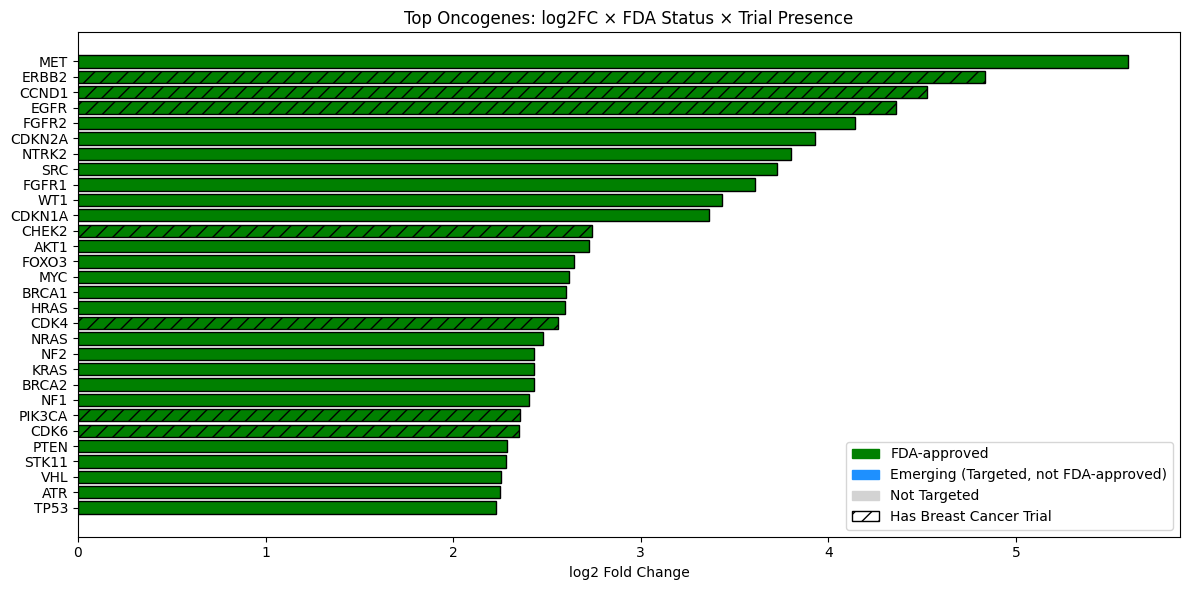

✅ Saved as final_master_gene_table_UPDATED_29July.csv


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 📂 Load your updated dataframe
#final_df3 = pd.read_csv("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_24July.csv")

# 🧹 Filter top N genes by log2FC across datasets
top_genes = (
    final_df
    .sort_values(by="log2FC", ascending=False)
    .drop_duplicates(subset="Gene")  # Keep top entry per gene
    .head(30)
    .copy()
)

# 🏷 Assign bar color based on FDA approval
def get_bar_color(row):
    if row["FDA_Approved_Drug"] == "Yes":
        return "green"
    elif row["DGIdb Status"] == "Targeted":
        return "dodgerblue"
    else:
        return "lightgray"

# 📐 Plot setup
fig, ax = plt.subplots(figsize=(12, 6))
bar_colors = top_genes.apply(get_bar_color, axis=1)
bar_positions = range(len(top_genes))

# 🔲 Barplot with optional hatching for trial
bars = ax.barh(
    bar_positions,
    top_genes["log2FC"],
    color=bar_colors,
    edgecolor="black"
)

# 🎯 Apply hatch pattern for genes with active trials
for i, bar in enumerate(bars):
    if top_genes.iloc[i]["Has Breast Cancer Trial"]:
        bar.set_hatch("//")  # Diagonal lines

# 🧾 Labeling
ax.set_yticks(bar_positions)
ax.set_yticklabels(top_genes["Gene"])
ax.invert_yaxis()
ax.set_xlabel("log2 Fold Change")
ax.set_title("Top Oncogenes: log2FC × FDA Status × Trial Presence")

# 📘 Legend
legend_handles = [
    mpatches.Patch(color="green", label="FDA-approved"),
    mpatches.Patch(color="dodgerblue", label="Emerging (Targeted, not FDA-approved)"),
    mpatches.Patch(color="lightgray", label="Not Targeted"),
    mpatches.Patch(facecolor="white", edgecolor="black", hatch="//", label="Has Breast Cancer Trial"),
]
ax.legend(handles=legend_handles, loc="lower right")

plt.tight_layout()
plt.show()

final_df.to_csv("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv", index=False)
print("✅ Saved as final_master_gene_table_UPDATED_29July.csv")


In [6]:
# Fix logic for DGIdb + FDA status
def classify_targeting(row):
    if row["DGIdb Status"] == "Targeted":
        return "FDA-approved" if row["FDA_Approved_Drug"] == "Yes" else "Emerging"
    else:
        return "Not Targeted"

final_df["Targeting Category"] = final_df.apply(classify_targeting, axis=1)
print(final_df["Targeting Category"].value_counts())
print(final_df[final_df["Targeting Category"] == "Emerging"][["Gene", "DGIdb Status", "FDA_Approved_Drug"]])


Targeting Category
FDA-approved    76
Emerging         2
Name: count, dtype: int64
     Gene DGIdb Status FDA_Approved_Drug
58  CASP8     Targeted                No
15  CASP8     Targeted                No


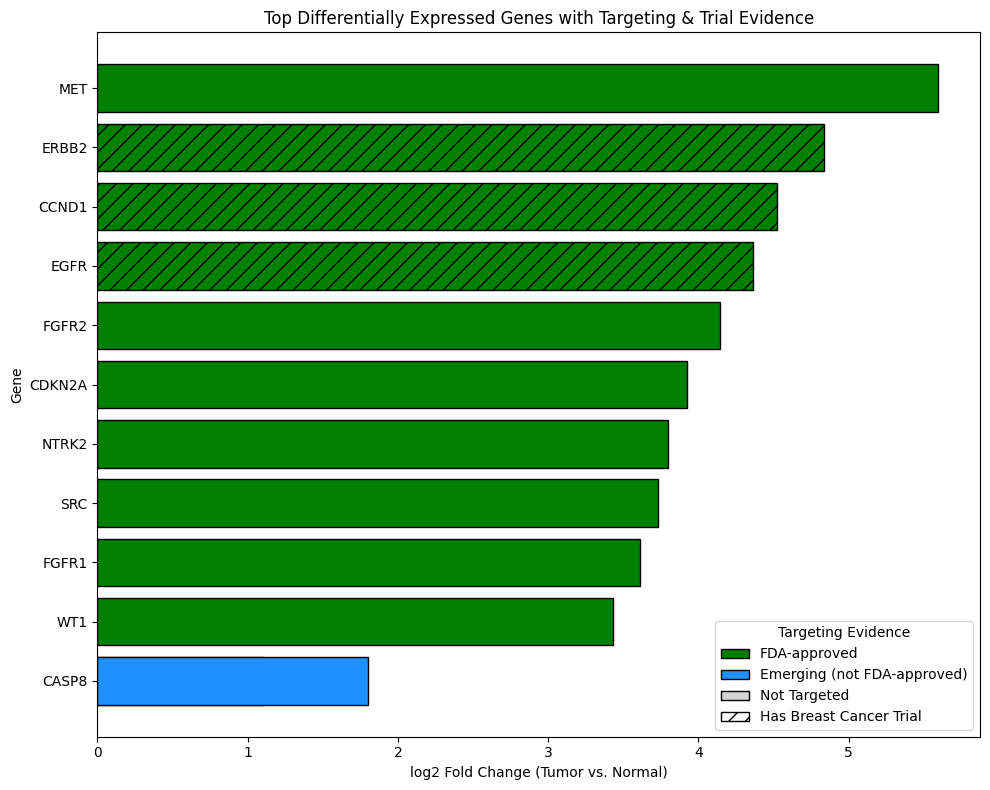

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the updated file
df = pd.read_csv("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv")

# Add absolute log2FC column for ranking
df["abs_log2FC"] = df["log2FC"].abs()

# Define Targeting Category
def categorize(row):
    if row["DGIdb Status"] == "Targeted":
        if row["FDA_Approved_Drug"] == "Yes":
            return "FDA-approved"
        else:
            return "Emerging"
    else:
        return "Not Targeted"

df["Targeting Category"] = df.apply(categorize, axis=1)

# Get top genes across categories (modify head count if needed)
top_genes = df.sort_values("abs_log2FC", ascending=False).groupby("Targeting Category").head(10)

# Sort for cleaner plotting
top_genes = top_genes.sort_values("log2FC", ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
colors = {
    "FDA-approved": "green",
    "Emerging": "dodgerblue",
    "Not Targeted": "lightgray"
}
hatch = "//"  # hatching for trial presence

bars = []
for i, row in top_genes.iterrows():
    bar = plt.barh(
        row["Gene"],
        row["log2FC"],
        color=colors[row["Targeting Category"]],
        hatch=hatch if row["Has Breast Cancer Trial"] else "",
        edgecolor="black"
    )
    bars.append(bar)

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='FDA-approved'),
    Patch(facecolor='dodgerblue', edgecolor='black', label='Emerging (not FDA-approved)'),
    Patch(facecolor='lightgray', edgecolor='black', label='Not Targeted'),
    Patch(facecolor='white', edgecolor='black', hatch='//', label='Has Breast Cancer Trial')
]
plt.legend(handles=legend_elements, title="Targeting Evidence", loc="lower right")

plt.xlabel("log2 Fold Change (Tumor vs. Normal)")
plt.ylabel("Gene")
plt.title("Top Differentially Expressed Genes with Targeting & Trial Evidence")
plt.tight_layout()
plt.show()



In [8]:
import pandas as pd

# Load the updated gene table
#df = pd.read_csv("~/Desktop/Capstone/Notebook recent/final_master_gene_table_UPDATED_29July.csv")

df["abs_log2FC"] = df["log2FC"].abs()

# Step 2: Filter for genes that are either:
#   (a) Targeted (from DGIdb) OR
#   (b) Have breast cancer trials
df_filtered = df[
    (df["DGIdb Status"].isin(["Targeted", "FDA-approved"])) |
    (df["Has Breast Cancer Trial"] == True)
].copy()

# Step 3: Sort by abs(log2FC) descending, and then by P-value ascending
df_filtered = df_filtered.sort_values(by=["abs_log2FC", "P-value"], ascending=[False, True])


df_filtered

# Save the result
# df_filtered.to_csv("~/Desktop/Capstone/Notebook recent/strong_DE_genes_with_targeting.csv", index=False)

# print("✅ Ranked and filtered list saved as strong_DE_genes_with_targeting.csv")


,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,FDA_Approved_Drug,abs_log2FC,Targeting Category
40,MET,GSE180286,5.054114e-74,5.594285,0.006545,Targeted,False,Other,Yes,5.594285,FDA-approved
41,ERBB2,GSE180286,0.000000e+00,4.833174,0.267847,Targeted,True,Other,Yes,4.833174,FDA-approved
42,CCND1,GSE180286,0.000000e+00,4.525871,0.483840,Targeted,True,CDK4–CCND1 Axis,Yes,4.525871,FDA-approved
43,EGFR,GSE180286,7.054600e-69,4.360219,0.007754,Targeted,True,PI3K–MAPK–EGFR,Yes,4.360219,FDA-approved
44,FGFR2,GSE180286,1.134424e-31,4.142219,0.003312,Targeted,False,Other,Yes,4.142219,FDA-approved
...,...,...,...,...,...,...,...,...,...,...,...
73,PTEN,GSE180286,2.035778e-133,0.841860,0.082482,Targeted,False,Other,Yes,0.841860,FDA-approved
74,SMAD4,GSE180286,3.837333e-24,0.817749,0.015181,Targeted,False,SMAD/TGF-β,Yes,0.817749,FDA-approved
75,BCL2,GSE180286,2.752630e-76,0.696170,0.062510,Targeted,False,Other,Yes,0.696170,FDA-approved
76,ATR,GSE180286,2.569517e-31,0.682509,0.024038,Targeted,False,Other,Yes,0.682509,FDA-approved


In [72]:
df = pd.read_csv("~/Desktop/Cancer_project/ghost-cell-busters/notebooks/gene_therapeutic_stratification_29July.csv")
print(df.shape)
print(df.head())
print(df["Therapeutic Category"].unique())


(78, 6)
     Gene    log2FC Pathway Category          Therapeutic Category  \
0     WT1  3.432435            Other  Lacks Breast Cancer Evidence   
1   ERBB2  3.260088            Other                  FDA-approved   
2     MET  3.249633            Other                  FDA-approved   
3  CDKN2A  3.184546            Other                  FDA-approved   
4    EGFR  3.021959   PI3K–MAPK–EGFR                  FDA-approved   

   OpenTargets_Score FDA_Approved_Drug  
0                NaN               Yes  
1           0.820020               Yes  
2           0.539556               Yes  
3           0.592468               Yes  
4           0.698097               Yes  
['Lacks Breast Cancer Evidence' 'FDA-approved' 'Emerging']


In [73]:
# Filter for "Lacks Breast Cancer Evidence"
df_lacks = df[df["Therapeutic Category"] == "Lacks Breast Cancer Evidence"]
print(df_lacks.shape)
print(df_lacks.head())

# Filter for "FDA-approved"
df_fda = df[df["Therapeutic Category"] == "FDA-approved"]
print(df_fda.shape)
print(df_fda.head())

# Filter for "Emerging"
df_emerging = df[df["Therapeutic Category"] == "Emerging"]
print(df_emerging.shape)
print(df_emerging.head())


(14, 6)
      Gene    log2FC Pathway Category          Therapeutic Category  \
0      WT1  3.432435            Other  Lacks Breast Cancer Evidence   
5   CDKN1A  2.916505            Other  Lacks Breast Cancer Evidence   
14     SRC  2.552239            Other  Lacks Breast Cancer Evidence   
15    NRAS  2.477481            Other  Lacks Breast Cancer Evidence   
16     NF2  2.430888            Other  Lacks Breast Cancer Evidence   

    OpenTargets_Score FDA_Approved_Drug  
0                 NaN               Yes  
5                 NaN               Yes  
14                NaN               Yes  
15                NaN               Yes  
16                NaN               Yes  
(62, 6)
     Gene    log2FC Pathway Category Therapeutic Category  OpenTargets_Score  \
1   ERBB2  3.260088            Other         FDA-approved           0.820020   
2     MET  3.249633            Other         FDA-approved           0.539556   
3  CDKN2A  3.184546            Other         FDA-approved        

In [74]:
# Rename columns in df_filtered or df consistently BEFORE applying function
print(df_filtered.columns.tolist())

df_filtered.rename(columns={
    "DGIdb_status": "DGIdb Status",
    "FDA_approved_drug": "FDA_Approved_Drug",
    "BreastCancerTrial": "Has Breast Cancer Trial"
}, inplace=True)

def assign_targeting_category(row):
    if row["FDA_Approved_Drug"] == "Yes":
        return "FDA-approved"
    elif (row["DGIdb Status"] == "Targeted") or (row["Has Breast Cancer Trial"] == True):
        return "Emerging"
    else:
        return "None"

print(df_filtered.apply(assign_targeting_category, axis=1).head())

df_filtered["Targeting Category"] = df_filtered.apply(assign_targeting_category, axis=1)

# Print using df_filtered
print(df_filtered[["Gene", "Targeting Category", "DGIdb Status", "FDA_Approved_Drug", "Has Breast Cancer Trial"]].head(10))
print(df_filtered["Targeting Category"].value_counts())


['Gene', 'log2FC', 'Pathway Category', 'Therapeutic Category', 'OpenTargets_Score', 'FDA_Approved_Drug']
Empty DataFrame
Columns: [Gene, log2FC, Pathway Category, Therapeutic Category, OpenTargets_Score, FDA_Approved_Drug]
Index: []


ValueError: Cannot set a DataFrame with multiple columns to the single column Targeting Category

In [76]:
# interactions_path = "~../Desktop/Cancer_project/ghost-cell-busters/interactions.tsv"
# dgidb_df = pd.read_csv(interactions_path, sep="\t")
# dgidb_df.head(3)
import os
import pandas as pd

# Expand tilde to full path
interactions_path = os.path.expanduser("~/Desktop/Cancer_project/ghost-cell-busters/interactions.tsv")

# Load the file
dgidb_df = pd.read_csv(interactions_path, sep="\t")

# Quick check
print(dgidb_df.head())

# Focus only on approved or anti-neoplastic interactions
dgidb_filtered = dgidb_df[
    (dgidb_df["approved"] == True) | (dgidb_df["anti_neoplastic"] == True)
]

# Get unique druggable gene names
druggable_genes_dgidb = dgidb_filtered["gene_name"].unique()
print(f"✅ Total druggable genes in DGIdb: {len(druggable_genes_dgidb)}")


  gene_claim_name gene_concept_id gene_name interaction_source_db_name  \
0          CYP2D6       hgnc:2625    CYP2D6                        DTC   
1           PPARG       hgnc:9236     PPARG                        DTC   
2           ATAD5      hgnc:25752     ATAD5                        DTC   
3            RGS4      hgnc:10000      RGS4                        DTC   
4           MAPK1       hgnc:6871     MAPK1                        DTC   

  interaction_source_db_version interaction_type  interaction_score  \
0                        9/2/20              NaN           0.017709   
1                        9/2/20              NaN           0.840123   
2                        9/2/20              NaN           0.177992   
3                        9/2/20              NaN           0.034319   
4                        9/2/20              NaN           0.050007   

           drug_claim_name       drug_concept_id                drug_name  \
0               RACLOPRIDE          ncit:C152139   

In [77]:
# Load your most recent master file
csv_path = os.path.expanduser("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv")

# Update DGIdb status based on interaction.tsv
df["DGIdb Status (interactions.tsv)"] = df["Gene"].isin(druggable_genes_dgidb).map({True: "Targeted", False: "Not Targeted"})

#csv_path = os.path.expanduser("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv")
# Load master table
df = pd.read_csv(csv_path)
# Extract druggable genes from DGIdb interactions
druggable_genes_dgidb = dgidb_df["gene_name"].dropna().unique()

# Update DGIdb status from interaction file
df["DGIdb Status (interactions_path)"] = df["Gene"].isin(druggable_genes_dgidb).map({True: "Targeted", False: "Not Targeted"})

print("✅ DGIdb status updated based on interactions.tsv")

✅ DGIdb status updated based on interactions.tsv


In [78]:
import requests
import pandas as pd

import requests
import pandas as pd

# ✅ Step 1: Open Targets API call
url = "https://api.platform.opentargets.org/api/v4/graphql"

query = """
query BreastCancerTargets($efoId: String!, $size: Int!) {
  disease(efoId: $efoId) {
    associatedTargets(page: { index: 0, size: $size }) {
      rows {
        target {
          approvedSymbol
        }
        score
      }
    }
  }
}
"""

variables = {
    "efoId": "EFO_0000305",  # breast cancer
    "size": 500
}

response = requests.post(url, json={"query": query, "variables": variables})
data = response.json()

# ✅ Step 2: Parse results
if "errors" in data:
    raise ValueError("❌ API Error:", data["errors"])

rows = data["data"]["disease"]["associatedTargets"]["rows"]

open_targets_df = pd.DataFrame([
    {
        "Gene": row["target"]["approvedSymbol"],
        "OpenTargets_Score": row["score"]
    }
    for row in rows if row.get("score") is not None
])

# Optional: Filter high-scoring genes
open_targets_df = open_targets_df[open_targets_df["OpenTargets_Score"] >= 0.5]

print("✅ Retrieved Open Targets genes:", open_targets_df.shape)
print(open_targets_df.head(3))

# ✅ Step 3: Merge with your master file
master_path = "~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv"
final_df = pd.read_csv(master_path)

# Safety check
assert "Gene" in final_df.columns, "❌ 'Gene' column not found in master file"

merged_df = final_df.merge(open_targets_df, how="left", on="Gene")
merged_df["Has Breast Cancer Trial (Open Targets)"] = merged_df["OpenTargets_Score"].notna()

merged_df.head(3)



# ----------------------------
# ✅ Step 3: Save Updated Table
# ----------------------------
# merged_df.to_csv("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_30July_with_OpenTargets.csv", index=False)
# print("✅ Merged and saved:", merged_df.shape)







✅ Retrieved Open Targets genes: (316, 2)
     Gene  OpenTargets_Score
0   BRCA2           0.901557
1   BRCA1           0.875045
2  PIK3CA           0.855934


,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,FDA_Approved_Drug,OpenTargets_Score,Has Breast Cancer Trial (Open Targets)
0,WT1,GSE161529,1.302410e-46,3.432435,0.001784,Targeted,False,Other,Yes,NaN,False
1,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,Targeted,True,Other,Yes,0.820020,True
2,MET,GSE161529,0.000000e+00,3.249633,0.127505,Targeted,False,Other,Yes,0.539556,True


In [79]:
import pandas as pd

# Load interaction data
# interactions_path = "~/Desktop/Cancer_project/ghost-cell-busters/interactions.tsv"
# dgidb_df = pd.read_csv(interactions_path, sep="\t")

# Ensure all string fields are lowercase for matching
dgidb_df = dgidb_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Step 1: Look for breast-cancer mentions in any field (especially drug name or source info)
breast_related = dgidb_df[
    dgidb_df.apply(lambda row: any("breast" in str(val) for val in row.values), axis=1)
]

# Step 2: Extract list of genes involved in breast cancer–targeted interactions
breast_cancer_genes_dgidb = breast_related["gene_name"].str.upper().unique().tolist()

print(f"✅ Identified {len(breast_cancer_genes_dgidb)} breast cancer–targeted genes from DGIdb.")

# Optional preview
print("Sample genes:", breast_cancer_genes_dgidb[:10])



/var/folders/kx/1z2nljtd7zqgfpqmrmskdmqc0000gn/T/ipykernel_63860/1879367272.py:8: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



✅ Identified 2 breast cancer–targeted genes from DGIdb.
Sample genes: ['ERBB2', 'KLK3']


In [14]:
import pandas as pd

# STEP 1: Load master file and Open Targets results
final_df = pd.read_csv("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv")

# STEP 2: Assume open_targets_df is already in memory with breast cancer genes and scores
# Columns: ["Gene", "OpenTargets_Score"]

# STEP 3: Filter genes marked as druggable by DGIdb
dgidb_targeted_df = final_df[final_df["DGIdb Status"] == "Targeted"].copy()

# STEP 4: Post-hoc merge with Open Targets — keep all DGIdb genes and annotate if they are also breast cancer targets
merged_df = dgidb_targeted_df.merge(open_targets_df, how="left", on="Gene")

# STEP 5: Flag if supported in breast cancer
merged_df["BreastCancer_Supported"] = merged_df["OpenTargets_Score"].notna()
merged_df["Strong_BreastCancer_Support"] = merged_df["OpenTargets_Score"] >= 0.5

# Optional: Sort for reporting
merged_df = merged_df.sort_values(
    by=["Strong_BreastCancer_Support", "OpenTargets_Score", "log2FC"],
    ascending=[False, False, False]
)

# # STEP 6: Save and preview
# merged_df.to_csv("druggable_genes_with_breast_cancer_support.csv", index=False)
# print("✅ Saved: druggable_genes_with_breast_cancer_support.csv")
# display_cols = ["Gene", "log2FC", "P-value", "DGIdb Status", "OpenTargets_Score", "Strong_BreastCancer_Support"]
print(merged_df.head(10))



      Gene    Dataset        P-value    log2FC  Mean Difference DGIdb Status  \
18   BRCA2  GSE161529  2.219567e-243  2.428688         0.025190     Targeted   
56   BRCA2  GSE180286  2.289587e-121  1.919169         0.031712     Targeted   
11   BRCA1  GSE161529  6.134444e-310  2.599673         0.028212     Targeted   
51   BRCA1  GSE180286  2.057328e-187  2.527845         0.035059     Targeted   
20  PIK3CA  GSE161529   0.000000e+00  2.354897         0.077707     Targeted   
67  PIK3CA  GSE180286   1.396424e-95  1.181716         0.040957     Targeted   
27    TP53  GSE161529   0.000000e+00  2.227463         0.104821     Targeted   
63    TP53  GSE180286  2.616298e-139  1.536773         0.047086     Targeted   
6    CHEK2  GSE161529   0.000000e+00  2.741095         0.033322     Targeted   
70   CHEK2  GSE180286   4.514782e-23  1.087656         0.010140     Targeted   

    Has Breast Cancer Trial Pathway Category FDA_Approved_Drug  \
18                    False            Other         

In [81]:
import pandas as pd

def assign_targeting_category(row):
    if row['FDA_Approved_Drug'] == 'Yes' and row['DGIdb Status'] == 'Targeted':
        return 'FDA-approved'
    elif row['Has Breast Cancer Trial'] == True or (pd.notna(row['OpenTargets_Score']) and row['OpenTargets_Score'] >= 0.5):
        return 'Emerging'
    else:
        return 'Not Targeted'

merged_df['Targeting Category'] = merged_df.apply(assign_targeting_category, axis=1)
print(merged_df['Targeting Category'].value_counts())


Targeting Category
FDA-approved    76
Emerging         2
Name: count, dtype: int64


In [ ]:
# def assign_targeting_category(row):
#     if row['FDA_Approved_Drug'] == 'Yes' and row['DGIdb Status'] == 'Targeted':
#         return 'FDA-approved'
#     elif row['Has Breast Cancer Trial'] == True or (row['OpenTargets_Score'] is not None and row['OpenTargets_Score'] >= 0.5):
#         return 'Emerging'
#     else:
#         return 'Not Targeted'

# merged_df['Targeting Category'] = merged_df.apply(assign_targeting_category, axis=1)
# print(merged_df['Targeting Category'].value_counts())

Targeting Category
FDA-approved    76
Emerging         2
Name: count, dtype: int64


In [85]:
print(merged_df.columns)
merged_df["BreastCancer_Supported"] = merged_df["OpenTargets_Score"].notna()



Index(['Gene', 'Dataset', 'P-value', 'log2FC', 'Mean Difference',
       'DGIdb Status', 'Has Breast Cancer Trial', 'Pathway Category',
       'FDA_Approved_Drug', 'OpenTargets_Score',
       'Has Breast Cancer Trial (Open Targets)', 'Targeting Category'],
      dtype='object')


In [115]:
high_conf_bc = merged_df[
    (merged_df["BreastCancer_Supported"]) &
    (merged_df["OpenTargets_Score"] >= 0.5)
]
high_conf_bc = high_conf_bc.sort_values(by="log2FC", ascending=False)
high_conf_bc.head(10)
#print(len(high_conf_bc))

,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,FDA_Approved_Drug,OpenTargets_Score,Has Breast Cancer Trial (Open Targets),Targeting Category,BreastCancer_Supported
40,MET,GSE180286,5.054114e-74,5.594285,0.006545,Targeted,False,Other,Yes,0.539556,True,FDA-approved,True
41,ERBB2,GSE180286,0.000000e+00,4.833174,0.267847,Targeted,True,Other,Yes,0.820020,True,FDA-approved,True
42,CCND1,GSE180286,0.000000e+00,4.525871,0.483840,Targeted,True,CDK4–CCND1 Axis,Yes,0.568711,True,FDA-approved,True
43,EGFR,GSE180286,7.054600e-69,4.360219,0.007754,Targeted,True,PI3K–MAPK–EGFR,Yes,0.698097,True,FDA-approved,True
44,FGFR2,GSE180286,1.134424e-31,4.142219,0.003312,Targeted,False,Other,Yes,0.782859,True,FDA-approved,True
45,CDKN2A,GSE180286,0.000000e+00,3.926487,0.074630,Targeted,False,Other,Yes,0.592468,True,FDA-approved,True
46,NTRK2,GSE180286,3.119246e-51,3.800407,0.006892,Targeted,False,Other,Yes,0.572862,True,FDA-approved,True
48,FGFR1,GSE180286,0.000000e+00,3.608174,0.090912,Targeted,False,Other,Yes,0.501992,True,FDA-approved,True
1,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,Targeted,True,Other,Yes,0.820020,True,FDA-approved,True
2,MET,GSE161529,0.000000e+00,3.249633,0.127505,Targeted,False,Other,Yes,0.539556,True,FDA-approved,True


In [87]:
import pandas as pd

# Step 1: Biological filters - strong significance and expression
strong_bio = merged_df[
    (merged_df["P-value"] <= 1e-5) &
    (merged_df["log2FC"] >= 1.0)
].copy()

# Step 2: Therapeutic relevance filtering
relevant_therapeutics = strong_bio[
    (strong_bio["Targeting Category"].isin(["FDA-approved", "Emerging"])) |
    (strong_bio["OpenTargets_Score"] >= 0.5) |
    ((strong_bio["Targeting Category"] == "Not Targeted") & (strong_bio["log2FC"] >= 2.0))
].copy()

# Step 3: Compute PriorityScore safely using .loc
relevant_therapeutics.loc[:, "PriorityScore"] = (
    relevant_therapeutics["log2FC"] * relevant_therapeutics["OpenTargets_Score"].fillna(0)
)

# Step 4: Sort by PriorityScore descending
relevant_therapeutics = relevant_therapeutics.sort_values(by="PriorityScore", ascending=False)

# Preview top genes
print(relevant_therapeutics.head(10))

# Optional: Save to CSV
# relevant_therapeutics.to_csv("final_therapeutic_gene_list.csv", index=False)
# print("✅ Saved: final_therapeutic_gene_list.csv")


# Optional: Save to CSV
# relevant_therapeutics.to_csv("final_therapeutic_gene_list.csv", index=False)
# print("✅ Saved: final_therapeutic_gene_list.csv")

# # Save
# relevant_therapeutics.to_csv("final_therapeutic_gene_list.csv", index=False)
# print("✅ Saved: final_therapeutic_gene_list.csv")


      Gene    Dataset        P-value    log2FC  Mean Difference DGIdb Status  \
41   ERBB2  GSE180286   0.000000e+00  4.833174         0.267847     Targeted   
44   FGFR2  GSE180286   1.134424e-31  4.142219         0.003312     Targeted   
43    EGFR  GSE180286   7.054600e-69  4.360219         0.007754     Targeted   
40     MET  GSE180286   5.054114e-74  5.594285         0.006545     Targeted   
1    ERBB2  GSE161529   0.000000e+00  3.260088         0.789027     Targeted   
42   CCND1  GSE180286   0.000000e+00  4.525871         0.483840     Targeted   
45  CDKN2A  GSE180286   0.000000e+00  3.926487         0.074630     Targeted   
6    CHEK2  GSE161529   0.000000e+00  2.741095         0.033322     Targeted   
11   BRCA1  GSE161529  6.134444e-310  2.599673         0.028212     Targeted   
50    AKT1  GSE180286  2.764915e-197  2.725133         0.032487     Targeted   

    Has Breast Cancer Trial Pathway Category FDA_Approved_Drug  \
41                     True            Other         

In [88]:

# 🟩 Step 2: Define inclusion based on ANY of the therapeutic relevance
relevant_therapeutics_refined = relevant_therapeutics[
    (relevant_therapeutics["DGIdb Status"].isin(["Targeted", "Not Targeted"])) &
    (relevant_therapeutics["Targeting Category"].isin(["FDA-approved", "Emerging", "Not Targeted"])) &
    (relevant_therapeutics["OpenTargets_Score"] >= 0.5)  # Breast cancer relevance
].copy()

# 🟩 Step 3: Optional — Compute a priority score
# relevant_therapeutics["PriorityScore"] = (
#     relevant_therapeutics["log2FC"].abs() * relevant_therapeutics["OpenTargets_Score"]
# )

# 🟩 Step 4: Sort
relevant_therapeutics_refined = relevant_therapeutics_refined.sort_values("PriorityScore", ascending=False)

# 🟩 Step 5: Check targeting category counts
print("Targeting Category counts:")
print(relevant_therapeutics_refined["Targeting Category"].value_counts())

Targeting Category counts:
Targeting Category
FDA-approved    55
Emerging         2
Name: count, dtype: int64


In [89]:
import pandas as pd

# Step 1: Biological filters - strong significance and expression
strong_bio = merged_df[
    (merged_df["P-value"] <= 1e-5) &
    (merged_df["log2FC"] >= 1.0)
].copy()

# Step 2: Therapeutic relevance filtering
relevant_therapeutics = strong_bio[
    (strong_bio["Targeting Category"].isin(["FDA-approved", "Emerging", "Not Targeted"])) &
    (strong_bio["OpenTargets_Score"] >= 0.5)
].copy()

# Step 3: Compute PriorityScore safely (log2FC * OpenTargets_Score; fill missing with 0)
relevant_therapeutics.loc[:, "PriorityScore"] = (
    relevant_therapeutics["log2FC"] * relevant_therapeutics["OpenTargets_Score"].fillna(0)
)

# Step 4: Sort by PriorityScore descending
relevant_therapeutics_refined = relevant_therapeutics.sort_values(by="PriorityScore", ascending=False)

# Step 5: Summary counts for targeting categories
print("Targeting Category counts:")
print(relevant_therapeutics_refined["Targeting Category"].value_counts())

# Step 6: Preview top genes
print(relevant_therapeutics_refined.head(10))

# Optionally save filtered and prioritized table
# relevant_therapeutics_refined.to_csv("filtered_prioritized_genes.csv", index=False)


Targeting Category counts:
Targeting Category
FDA-approved    55
Emerging         2
Name: count, dtype: int64
      Gene    Dataset        P-value    log2FC  Mean Difference DGIdb Status  \
41   ERBB2  GSE180286   0.000000e+00  4.833174         0.267847     Targeted   
44   FGFR2  GSE180286   1.134424e-31  4.142219         0.003312     Targeted   
43    EGFR  GSE180286   7.054600e-69  4.360219         0.007754     Targeted   
40     MET  GSE180286   5.054114e-74  5.594285         0.006545     Targeted   
1    ERBB2  GSE161529   0.000000e+00  3.260088         0.789027     Targeted   
42   CCND1  GSE180286   0.000000e+00  4.525871         0.483840     Targeted   
45  CDKN2A  GSE180286   0.000000e+00  3.926487         0.074630     Targeted   
6    CHEK2  GSE161529   0.000000e+00  2.741095         0.033322     Targeted   
11   BRCA1  GSE161529  6.134444e-310  2.599673         0.028212     Targeted   
50    AKT1  GSE180286  2.764915e-197  2.725133         0.032487     Targeted   

    Has B

In [90]:
# STEP 1: Load the most recent version of your master table
full_df = pd.read_csv("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv")

# STEP 2: Merge with DGIdb interaction-derived targeting status (already done earlier)
# If already added: DGIdb Status, FDA_Approved_Drug, Targeting Category

# STEP 3: Merge with Open Targets breast cancer association scores
# Ensure open_targets_df is defined in memory
full_df = full_df.merge(open_targets_df, how="left", on="Gene")
# Ensure breast cancer relevance flag is available
full_df["Strong_BreastCancer_Support"] = full_df["OpenTargets_Score"] >= 0.5

def assign_targeting_category(row):
    if row["Strong_BreastCancer_Support"]:  # Must be breast cancer–supported
        if row["DGIdb Status"] == "Targeted":
            if row["FDA_Approved_Drug"] == "Yes":
                return "FDA-approved"
            else:
                return "Emerging"
        else:
            return "Not Targeted"
    else:
        return "Unsupported"  # optional: can exclude these later

# Apply it
full_df["Targeting Category"] = full_df.apply(assign_targeting_category, axis=1)

# STEP 4: Define final breast cancer support flag
full_df["BreastCancer_Supported"] = full_df["OpenTargets_Score"].notna()
full_df["Strong_BreastCancer_Support"] = full_df["OpenTargets_Score"] >= 0.5

# STEP 5 (optional): Compute PriorityScore
full_df["PriorityScore"] = (
    full_df["log2FC"].abs() * full_df["OpenTargets_Score"]
)

# ✅ Now `full_df` is ready for use in further filtering
full_df.head(3)


,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,FDA_Approved_Drug,OpenTargets_Score,Strong_BreastCancer_Support,Targeting Category,BreastCancer_Supported,PriorityScore
0,WT1,GSE161529,1.302410e-46,3.432435,0.001784,Targeted,False,Other,Yes,NaN,False,Unsupported,False,NaN
1,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,Targeted,True,Other,Yes,0.820020,True,FDA-approved,True,2.673338
2,MET,GSE161529,0.000000e+00,3.249633,0.127505,Targeted,False,Other,Yes,0.539556,True,FDA-approved,True,1.753360


In [91]:
print("✅ Therapeutic relevance distribution:")
print(full_df["Targeting Category"].value_counts())



✅ Therapeutic relevance distribution:
Targeting Category
FDA-approved    62
Unsupported     14
Emerging         2
Name: count, dtype: int64


In [92]:
# ✅ Replace "Unsupported" with "Lacks Breast Cancer Evidence"
full_df["Targeting Category"] = full_df["Targeting Category"].replace({
    "Unsupported": "Lacks Breast Cancer Evidence"
})

# 🧾 Confirm the change
print("✅ Updated Targeting Category distribution:")
print(full_df["Targeting Category"].value_counts())



✅ Updated Targeting Category distribution:
Targeting Category
FDA-approved                    62
Lacks Breast Cancer Evidence    14
Emerging                         2
Name: count, dtype: int64


In [93]:
# 🧬 Group genes by Targeting Category
fda_genes = full_df.loc[full_df["Targeting Category"] == "FDA-approved", "Gene"].unique().tolist()
emerging_genes = full_df.loc[full_df["Targeting Category"] == "Emerging", "Gene"].unique().tolist()
lacking_evidence_genes = full_df.loc[full_df["Targeting Category"] == "Lacks Breast Cancer Evidence", "Gene"].unique().tolist()

# 🖨️ Print gene lists
print("✅ FDA-approved genes ({}):".format(len(fda_genes)))
print(fda_genes)

print("\n🧪 Emerging genes ({}):".format(len(emerging_genes)))
print(emerging_genes)

print("\n⚠️ Lacks Breast Cancer Evidence ({}):".format(len(lacking_evidence_genes)))
print(lacking_evidence_genes)


✅ FDA-approved genes (31):
['ERBB2', 'MET', 'CDKN2A', 'EGFR', 'CHEK2', 'FGFR1', 'FOXO3', 'AKT1', 'MYC', 'BRCA1', 'HRAS', 'CDK4', 'KRAS', 'BRCA2', 'NF1', 'PIK3CA', 'CDK6', 'PTEN', 'STK11', 'CCND1', 'ATR', 'TP53', 'SMAD4', 'MDM2', 'RB1', 'TSC2', 'NOTCH1', 'NTRK2', 'FGFR2', 'BCL2', 'ATM']

🧪 Emerging genes (1):
['CASP8']

⚠️ Lacks Breast Cancer Evidence (8):
['WT1', 'CDKN1A', 'SRC', 'NRAS', 'NF2', 'VHL', 'BAX', 'NTRK1']


In [94]:
import pandas as pd

# Assuming full_df is your master DataFrame with 'Targeting Category' and related columns

# Group genes by Targeting Category
fda_genes = full_df.loc[full_df["Targeting Category"] == "FDA-approved", "Gene"].unique().tolist()
emerging_genes = full_df.loc[full_df["Targeting Category"] == "Emerging", "Gene"].unique().tolist()
lacking_evidence_genes = full_df.loc[full_df["Targeting Category"] == "Lacks Breast Cancer Evidence", "Gene"].unique().tolist()

# Print gene lists
print(f"✅ FDA-approved genes ({len(fda_genes)}):")
print(fda_genes)

print(f"\n🧪 Emerging genes ({len(emerging_genes)}):")
print(emerging_genes)

print(f"\n⚠️ Lacks Breast Cancer Evidence genes ({len(lacking_evidence_genes)}):")
print(lacking_evidence_genes)

# Summary stats for Lacks Breast Cancer Evidence genes
lacks_bc_df = full_df[full_df["Targeting Category"] == "Lacks Breast Cancer Evidence"]

print("\nSummary stats for 'Lacks Breast Cancer Evidence' genes:")
print(lacks_bc_df.describe(include='all'))

# Show top 'Lacks Breast Cancer Evidence' genes by log2FC
top_lacks_bc = lacks_bc_df.sort_values(by="log2FC", ascending=False)
print("\nTop 'Lacks Breast Cancer Evidence' genes by log2FC:")
print(top_lacks_bc[["Gene", "log2FC", "Pathway Category", "OpenTargets_Score"]].head(15))


✅ FDA-approved genes (31):
['ERBB2', 'MET', 'CDKN2A', 'EGFR', 'CHEK2', 'FGFR1', 'FOXO3', 'AKT1', 'MYC', 'BRCA1', 'HRAS', 'CDK4', 'KRAS', 'BRCA2', 'NF1', 'PIK3CA', 'CDK6', 'PTEN', 'STK11', 'CCND1', 'ATR', 'TP53', 'SMAD4', 'MDM2', 'RB1', 'TSC2', 'NOTCH1', 'NTRK2', 'FGFR2', 'BCL2', 'ATM']

🧪 Emerging genes (1):
['CASP8']

⚠️ Lacks Breast Cancer Evidence genes (8):
['WT1', 'CDKN1A', 'SRC', 'NRAS', 'NF2', 'VHL', 'BAX', 'NTRK1']

Summary stats for 'Lacks Breast Cancer Evidence' genes:
          Gene    Dataset       P-value     log2FC  Mean Difference  \
count       14         14  1.400000e+01  14.000000        14.000000   
unique       8          2           NaN        NaN              NaN   
top     CDKN1A  GSE161529           NaN        NaN              NaN   
freq         2          8           NaN        NaN              NaN   
mean       NaN        NaN  9.322260e-13   2.395102         0.116825   
std        NaN        NaN  3.488070e-12   0.755525         0.157081   
min        NaN     

In [95]:
import plotly.graph_objects as go

import plotly.graph_objects as go

# Define genes by category
fda_genes = ['ERBB2', 'MET', 'CDKN2A', 'EGFR', 'CHEK2', 'FGFR1', 'FOXO3', 'AKT1', 'MYC', 'BRCA1',
             'HRAS', 'CDK4', 'KRAS', 'BRCA2', 'NF1', 'PIK3CA', 'CDK6', 'PTEN', 'STK11', 'CCND1',
             'ATR', 'TP53', 'SMAD4', 'MDM2', 'RB1', 'TSC2', 'NOTCH1', 'NTRK2', 'FGFR2', 'BCL2', 'ATM']

emerging_genes = ['CASP8']

unsupported_genes = ['WT1', 'CDKN1A', 'SRC', 'NRAS', 'NF2', 'VHL', 'BAX', 'NTRK1']

# Create master list of gene names and final category names
gene_labels = fda_genes + emerging_genes + unsupported_genes
categories = ["FDA-approved", "Emerging", "Lacks Breast Cancer Evidence"]
label_list = gene_labels + categories

# Mapping index
label_to_index = {label: i for i, label in enumerate(label_list)}

# Build links from each gene to its category
source = []
target = []
value = []

for gene in fda_genes:
    source.append(label_to_index[gene])
    target.append(label_to_index["FDA-approved"])
    value.append(1)

for gene in emerging_genes:
    source.append(label_to_index[gene])
    target.append(label_to_index["Emerging"])
    value.append(1)

for gene in unsupported_genes:
    source.append(label_to_index[gene])
    target.append(label_to_index["Lacks Breast Cancer Evidence"])
    value.append(1)

# Colors: assign by category
colors = (
    ["#4CAF50"] * len(fda_genes) +  # Green
    ["#FFC107"] * len(emerging_genes) +  # Amber
    ["#F44336"] * len(unsupported_genes) +  # Red
    ["#4CAF50", "#FFC107", "#F44336"]  # Category nodes
)

# Build Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color="black", width=0.5),
        label=label_list,
        color=colors
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[colors[s] for s in source]  # Match link color with gene node
    )
)])

fig.update_layout(
    title_text="🧬 Gene-level Therapeutic Stratification for Breast Cancer",
    font_size=12,
    height=800
)

fig.show()




In [96]:
full_df.head(3)

,Gene,Dataset,P-value,log2FC,Mean Difference,DGIdb Status,Has Breast Cancer Trial,Pathway Category,FDA_Approved_Drug,OpenTargets_Score,Strong_BreastCancer_Support,Targeting Category,BreastCancer_Supported,PriorityScore
0,WT1,GSE161529,1.302410e-46,3.432435,0.001784,Targeted,False,Other,Yes,NaN,False,Lacks Breast Cancer Evidence,False,NaN
1,ERBB2,GSE161529,0.000000e+00,3.260088,0.789027,Targeted,True,Other,Yes,0.820020,True,FDA-approved,True,2.673338
2,MET,GSE161529,0.000000e+00,3.249633,0.127505,Targeted,False,Other,Yes,0.539556,True,FDA-approved,True,1.753360


In [97]:
import plotly.graph_objects as go

# Assume df = your dataframe with these columns:
# 'Gene', 'log2FC', 'Therapeutic Category', 'Trial', 'Pathway Category'

df = full_df.copy()  # Replace with your actual dataframe variable
# Fill missing Trial and Pathway Category
if 'Trial' not in df.columns:
    df['Trial'] = 'No Trial'
df['Trial'] = df['Trial'].fillna('No Trial')
df['Pathway Category'] = df['Pathway Category'].fillna('Other')

# Unique nodes
categories = df['Targeting Category'].unique().tolist()
genes = df['Gene'].unique().tolist()
trials = df['Trial'].unique().tolist()
pathways = df['Pathway Category'].unique().tolist()

label_list = categories + genes + trials + pathways
label_to_idx = {label: i for i, label in enumerate(label_list)}

def log2fc_to_color(log2fc):
    max_abs = max(abs(df['log2FC'].min()), abs(df['log2FC'].max()))
    norm_val = (log2fc + max_abs) / (2 * max_abs)
    r = int(255 * norm_val)
    g = 0
    b = int(255 * (1 - norm_val))
    return f'rgba({r},{g},{b},0.8)'

source = []
target = []
value = []
link_colors = []

# Therapeutic Category -> Gene
for _, row in df.iterrows():
    source.append(label_to_idx[row['Targeting Category']])
    target.append(label_to_idx[row['Gene']])
    value.append(1)
    link_colors.append(log2fc_to_color(row['log2FC']))

# Gene -> Trial
for _, row in df.iterrows():
    source.append(label_to_idx[row['Gene']])
    target.append(label_to_idx[row['Trial']])
    value.append(1)
    link_colors.append(log2fc_to_color(row['log2FC']))

# Trial -> Pathway: assign colors based on the gene's log2FC
for _, row in df.iterrows():
    source.append(label_to_idx[row['Trial']])
    target.append(label_to_idx[row['Pathway Category']])
    value.append(1)
    # Use gene's log2FC color here as well
    link_colors.append(log2fc_to_color(row['log2FC']))

cat_colors = {
    'FDA-approved': 'green',
    'Emerging': 'orange',
    'Lacks Breast Cancer Evidence': 'red'
}
node_colors = [cat_colors.get(label, 'lightgray') for label in label_list]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color='black', width=0.5),
        label=label_list,
        color=node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors,
        hovertemplate='From %{source.label} to %{target.label}<extra></extra>'
    )
)])

fig.update_layout(
    title_text='🧬 Multi-level Therapeutic Stratification Sankey Diagram with log2FC Coloring',
    font_size=12,
    height=700,
    width=1200
)

fig.update_layout(
    title_text='🧬 Multi-level Therapeutic Stratification Sankey Diagram with log2FC Coloring',
    font_size=12,
    height=700,
    width=1200,
    # Add annotations for legend
    annotations=[
        dict(
            x=0.95, y=0.9,
            xref='paper', yref='paper',
            showarrow=False,
            text='<b>Color Legend</b>',
            font=dict(size=14)
        ),
        dict(
            x=0.95, y=0.85,
            xref='paper', yref='paper',
            showarrow=False,
            text='<span style="color:rgba(255,0,0,0.8)">&#11044;</span> Upregulated (High log2FC)',
            font=dict(size=12)
        ),
        dict(
            x=0.95, y=0.80,
            xref='paper', yref='paper',
            showarrow=False,
            text='<span style="color:rgba(0,0,255,0.8)">&#11044;</span> Downregulated (Low log2FC)',
            font=dict(size=12)
        )
    ]
)

fig.show()





In [99]:
# ✅ Step: Create gene-to-category mapping table
gene_category_df = pd.DataFrame({
    "Gene": fda_genes + emerging_genes + lacking_evidence_genes,
    "Targeting Category": (
        ["FDA-approved"] * len(fda_genes)
        + ["Emerging"] * len(emerging_genes)
        + ["Lacks Breast Cancer Evidence"] * len(lacking_evidence_genes)
    )
})

# ✅ Step: Export as a new file
gene_category_df.to_csv("gene_therapeutic_stratification_29July.csv", index=False)
print("📁 Saved as 'gene_therapeutic_stratification_29July.csv'")


📁 Saved as 'gene_therapeutic_stratification_29July.csv'


In [106]:
import pandas as pd

# Load master file with pathway info
master_df = pd.read_csv("~/Desktop/Cancer_project/ghost-cell-busters/final_master_gene_table_UPDATED_29July.csv")


# Load therapeutic stratification file
strat_df = pd.read_csv("~/Desktop/Cancer_project/ghost-cell-busters/notebooks/gene_therapeutic_stratification_29July.csv")

# Merge on 'Gene'
merged_df_total = strat_df.merge(master_df[['Gene', 'Pathway Category']], on='Gene', how='left')

print(merged_df_total.sample(20))


      Gene            Targeting Category Pathway Category
50    TSC2                  FDA-approved            Other
15    AKT1                  FDA-approved   PI3K–MAPK–EGFR
48     RB1                  FDA-approved            Other
49     RB1                  FDA-approved            Other
7     EGFR                  FDA-approved   PI3K–MAPK–EGFR
16     MYC                  FDA-approved         MYC Axis
38   CCND1                  FDA-approved  CDK4–CCND1 Axis
40     ATR                  FDA-approved            Other
32    CDK6                  FDA-approved  CDK4–CCND1 Axis
10   FGFR1                  FDA-approved            Other
13   FOXO3                  FDA-approved        mTOR/AMPK
3      MET                  FDA-approved            Other
30  PIK3CA                  FDA-approved   PI3K–MAPK–EGFR
63   CASP8                      Emerging            Other
14    AKT1                  FDA-approved   PI3K–MAPK–EGFR
76     BAX  Lacks Breast Cancer Evidence            Other
21    HRAS    

In [51]:
cols_to_keep = [
    "Gene", "log2FC", "p_value", "adj_p_value", "mean_diff",
    "Pathway Category", "Targeting Category", "OpenTargets_Score",
    "DGIdb_Status", "FDA_Approved_Drug", "Has_Breast_Cancer_Trial"
]

# Filter columns that actually exist to avoid errors
existing_cols = [col for col in cols_to_keep if col in full_df.columns]

gene_category_df = full_df[existing_cols].copy()
gene_category_df["Pathway Category"] = gene_category_df["Pathway Category"].fillna("Other")

gene_category_df.rename(columns={"Targeting Category": "Therapeutic Category"}, inplace=True)

gene_category_df.to_csv("gene_category_df.csv", index=False)

print(f"✅ gene_category_df.csv regenerated with columns: {existing_cols}")


✅ gene_category_df.csv regenerated with columns: ['Gene', 'log2FC', 'Pathway Category', 'Targeting Category', 'OpenTargets_Score', 'FDA_Approved_Drug']


In [107]:
cols_to_keep = [
    "Gene", "log2FC", "p_value", "adj_p_value", "mean_diff",
    "Pathway Category", "Targeting Category", "OpenTargets_Score",
    "DGIdb_Status", "FDA_Approved_Drug", "Has_Breast_Cancer_Trial"
]

# Filter columns that actually exist to avoid errors
existing_cols = [col for col in cols_to_keep if col in full_df.columns]

gene_category_df = full_df[existing_cols].copy()
gene_category_df["Pathway Category"] = gene_category_df["Pathway Category"].fillna("Other")

gene_category_df.rename(columns={"Targeting Category": "Therapeutic Category"}, inplace=True)

gene_category_df.to_csv("gene_category_df.csv", index=False)

print(f"✅ gene_category_df.csv regenerated with columns: {existing_cols}")
gene_category_df.to_csv("gene_therapeutic_stratification_29July.csv", index=False)
print("✅ gene_therapeutic_stratification_29July.csv regenerated and saved successfully.")








✅ gene_category_df.csv regenerated with columns: ['Gene', 'log2FC', 'Pathway Category', 'Targeting Category', 'OpenTargets_Score', 'FDA_Approved_Drug']
✅ gene_therapeutic_stratification_29July.csv regenerated and saved successfully.


In [108]:
#gene_category_df.sample(20)
# Example: keep the max log2FC per gene and take first for other columns
gene_category_df_clean = gene_category_df.sort_values('log2FC', ascending=False).drop_duplicates(subset=['Gene'])
gene_category_df_clean.sample(20)
# Or to average numeric columns:
# gene_category_df_clean = gene_category_df.groupby('Gene').agg({
#     'log2FC': 'mean',
#     'OpenTargets_Score': 'mean',
#     'Pathway Category': 'first',
#     'Therapeutic Category': 'first',
#     'FDA_Approved_Drug': 'first'
# }).reset_index()


,Gene,log2FC,Pathway Category,Therapeutic Category,OpenTargets_Score,FDA_Approved_Drug
27,TP53,2.227463,Other,FDA-approved,0.852160,Yes
0,WT1,3.432435,Other,Lacks Breast Cancer Evidence,NaN,Yes
11,BRCA1,2.599673,Other,FDA-approved,0.875045,Yes
21,CDK6,2.351542,CDK4–CCND1 Axis,FDA-approved,0.710736,Yes
23,STK11,2.283810,Other,FDA-approved,0.520575,Yes
28,SMAD4,2.224890,SMAD/TGF-β,FDA-approved,0.512793,Yes
16,NF2,2.430888,Other,Lacks Breast Cancer Evidence,NaN,Yes
15,NRAS,2.477481,Other,Lacks Breast Cancer Evidence,NaN,Yes
36,CASP8,1.804010,Other,Emerging,0.581988,No
46,NTRK2,3.800407,Other,FDA-approved,0.572862,Yes


In [109]:
# top_genes = gene_category_df[(gene_category_df["log2FC"] > 2) & (gene_category_df["OpenTargets_Score"] >= 0.7)]
# print(top_genes)
summary_by_therapeutic = gene_category_df.groupby("Therapeutic Category")["log2FC"].agg(['count', 'mean', 'median']).reset_index()
summary_by_pathway = gene_category_df.groupby("Pathway Category")["log2FC"].agg(['count', 'mean', 'median']).reset_index()

print(summary_by_therapeutic)
print(summary_by_pathway)


           Therapeutic Category  count      mean    median
0                      Emerging      2  1.453105  1.453105
1                  FDA-approved     62  2.304535  2.274987
2  Lacks Breast Cancer Evidence     14  2.395102  2.342658
  Pathway Category  count      mean    median
0  CDK4–CCND1 Axis      6  2.578412  2.389827
1         MYC Axis      2  1.789276  1.789276
2            Other     58  2.280792  2.164014
3   PI3K–MAPK–EGFR      8  2.502608  2.524911
4       SMAD/TGF-β      2  1.521319  1.521319
5        mTOR/AMPK      2  2.460196  2.460196


Summary stats for 'Lacks Breast Cancer Evidence' genes:
          Gene     log2FC Pathway Category          Therapeutic Category  \
count       14  14.000000               14                            14   
unique       8        NaN                1                             1   
top     CDKN1A        NaN            Other  Lacks Breast Cancer Evidence   
freq         2        NaN               14                            14   
mean       NaN   2.395102              NaN                           NaN   
std        NaN   0.755525              NaN                           NaN   
min        NaN   1.125685              NaN                           NaN   
25%        NaN   1.931997              NaN                           NaN   
50%        NaN   2.342658              NaN                           NaN   
75%        NaN   2.825438              NaN                           NaN   
max        NaN   3.728018              NaN                           NaN   

        OpenTargets_Score FDA_A

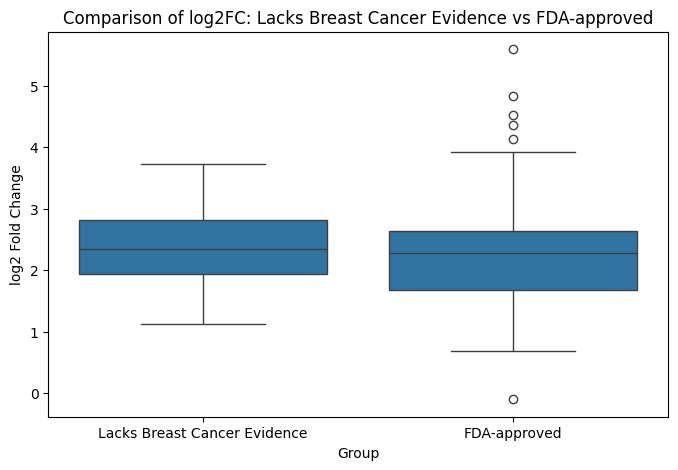


Top 'Lacks Breast Cancer Evidence' genes by log2FC:
      Gene    log2FC Pathway Category  OpenTargets_Score
47     SRC  3.728018            Other                NaN
0      WT1  3.432435            Other                NaN
49  CDKN1A  3.365022            Other                NaN
5   CDKN1A  2.916505            Other                NaN
14     SRC  2.552239            Other                NaN
15    NRAS  2.477481            Other                NaN
16     NF2  2.430888            Other                NaN
25     VHL  2.254428            Other                NaN
30     BAX  2.080420            Other                NaN
34   NTRK1  2.017507            Other                NaN
57    NRAS  1.903494            Other                NaN
59     NF2  1.717994            Other                NaN
64     BAX  1.529315            Other                NaN
68     VHL  1.125685            Other                NaN


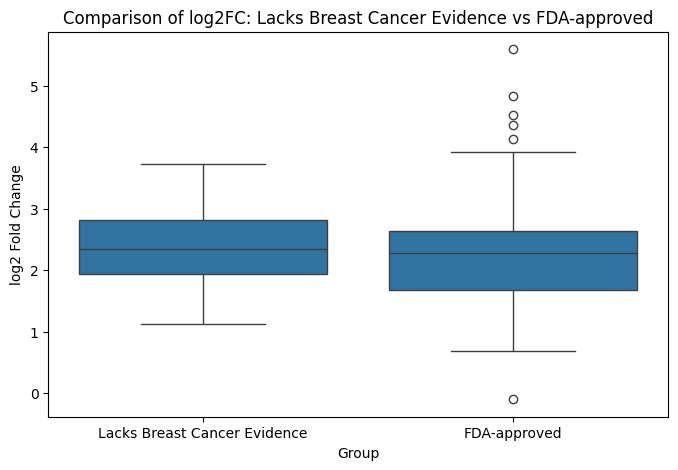


Top 'Lacks Breast Cancer Evidence' genes by log2FC:
      Gene    log2FC Pathway Category  OpenTargets_Score
47     SRC  3.728018            Other                NaN
0      WT1  3.432435            Other                NaN
49  CDKN1A  3.365022            Other                NaN
5   CDKN1A  2.916505            Other                NaN
14     SRC  2.552239            Other                NaN
15    NRAS  2.477481            Other                NaN
16     NF2  2.430888            Other                NaN
25     VHL  2.254428            Other                NaN
30     BAX  2.080420            Other                NaN
34   NTRK1  2.017507            Other                NaN
57    NRAS  1.903494            Other                NaN
59     NF2  1.717994            Other                NaN
64     BAX  1.529315            Other                NaN
68     VHL  1.125685            Other                NaN


In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter “Lacks Breast Cancer Evidence” genes
lacks_evidence_df = gene_category_df[gene_category_df["Therapeutic Category"] == "Lacks Breast Cancer Evidence"].copy()

# Summary statistics for this group
print("Summary stats for 'Lacks Breast Cancer Evidence' genes:")
print(lacks_evidence_df.describe(include='all'))
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter “Lacks Breast Cancer Evidence” genes
lacks_evidence_df = gene_category_df[gene_category_df["Therapeutic Category"] == "Lacks Breast Cancer Evidence"].copy()

# Summary statistics for this group
print("Summary stats for 'Lacks Breast Cancer Evidence' genes:")
print(lacks_evidence_df.describe(include='all'))

# Compare log2FC distribution against FDA-approved group
fda_approved_df = gene_category_df[gene_category_df["Therapeutic Category"] == "FDA-approved"].copy()

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=pd.concat([lacks_evidence_df.assign(Group='Lacks Breast Cancer Evidence'),
                    fda_approved_df.assign(Group='FDA-approved')]),
    x='Group',
    y='log2FC'
)
plt.title("Comparison of log2FC: Lacks Breast Cancer Evidence vs FDA-approved")
plt.ylabel("log2 Fold Change")
plt.show()

# List the genes sorted by log2FC descending (focus on highest overexpression)
top_lacks_evidence_genes = lacks_evidence_df.sort_values(by="log2FC", ascending=False)
print("\nTop 'Lacks Breast Cancer Evidence' genes by log2FC:")
print(top_lacks_evidence_genes[["Gene", "log2FC", "Pathway Category", "OpenTargets_Score"]])

# # Optional: export this subset for deeper manual review or annotation
# top_lacks_evidence_genes.to_csv("lacks_breast_cancer_evidence_genes_detailed.csv", index=False)
# print("\n✅ Exported 'Lacks Breast Cancer Evidence' detailed gene list to CSV.")

# Compare log2FC distribution against FDA-approved group
fda_approved_df = gene_category_df[gene_category_df["Therapeutic Category"] == "FDA-approved"].copy()

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=pd.concat([lacks_evidence_df.assign(Group='Lacks Breast Cancer Evidence'),
                    fda_approved_df.assign(Group='FDA-approved')]),
    x='Group',
    y='log2FC'
)
plt.title("Comparison of log2FC: Lacks Breast Cancer Evidence vs FDA-approved")
plt.ylabel("log2 Fold Change")
plt.show()

# List the genes sorted by log2FC descending (focus on highest overexpression)
top_lacks_evidence_genes = lacks_evidence_df.sort_values(by="log2FC", ascending=False)
print("\nTop 'Lacks Breast Cancer Evidence' genes by log2FC:")
print(top_lacks_evidence_genes[["Gene", "log2FC", "Pathway Category", "OpenTargets_Score"]])

# # Optional: export this subset for deeper manual review or annotation
# top_lacks_evidence_genes.to_csv("lacks_breast_cancer_evidence_genes_detailed.csv", index=False)
# print("\n✅ Exported 'Lacks Breast Cancer Evidence' detailed gene list to CSV.")


In [187]:
pip install gprofiler-official



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [111]:
print(df['Pathway Category'].unique())
# Check unique pathway names to verify exact spelling
print("Unique Pathway Categories:", df['Pathway Category'].unique())

# Now define your top pathways with exact names from above output
top_pathways = [
    "regulation of cell population proliferation",  # Adjust capitalization or spacing as needed
    "Thyroid cancer",
    "cell population proliferation",
    "negative regulation of cell population proliferation",
    "regulation of programmed cell death",
    "regulation of apoptotic process",
    "Ras protein signal transduction",
    "Signaling by NTRK3 (TRKC)",
    "negative regulation of apoptotic process",
    "negative regulation of programmed cell death"
]

# Filter the dataframe again
df_filtered = gene_category_df_clean[gene_category_df_clean['Pathway Category'].isin(top_pathways)].copy()

print(f"Filtered DataFrame shape: {df_filtered.shape}")
print(f"Filtered pathways present: {df_filtered['Pathway Category'].unique()}")



['Other' 'PI3K–MAPK–EGFR' 'mTOR/AMPK' 'MYC Axis' 'CDK4–CCND1 Axis'
 'SMAD/TGF-β']
Unique Pathway Categories: ['Other' 'PI3K–MAPK–EGFR' 'mTOR/AMPK' 'MYC Axis' 'CDK4–CCND1 Axis'
 'SMAD/TGF-β']
Filtered DataFrame shape: (0, 6)
Filtered pathways present: []


In [112]:
import plotly.graph_objects as go

# Your top enriched pathways from bar plot (replace with your exact strings)
top_pathways = [
    "regulation of cell population proliferation",
    "Thyroid cancer",
    "cell population proliferation",
    "negative regulation of cell population proliferation",
    "regulation of programmed cell death",
    "regulation of apoptotic process",
    "Ras protein signal transduction",
    "Signaling by NTRK3 (TRKC)",
    "negative regulation of apoptotic process",
    "negative regulation of programmed cell death"
]

# Filter dataframe to include only these pathways
#df = gene_category_df[gene_category_df["Pathway Category"].isin(top_pathways)].copy()

df = gene_category_df_clean.copy()

# Fill missing Therapeutic Category if any
df['Therapeutic Category'] = df['Therapeutic Category'].fillna('Unknown')

# Unique node labels
categories = df['Therapeutic Category'].unique().tolist()
genes = df['Gene'].unique().tolist()
pathways = df['Pathway Category'].unique().tolist()

label_list = categories + genes + pathways
label_to_idx = {label: i for i, label in enumerate(label_list)}

def log2fc_to_color(log2fc):
    max_abs = max(abs(df['log2FC'].min()), abs(df['log2FC'].max()))
    norm_val = (log2fc + max_abs) / (2 * max_abs)
    r = int(255 * norm_val)
    g = 0
    b = int(255 * (1 - norm_val))
    return f'rgba({r},{g},{b},0.8)'

source = []
target = []
value = []
link_colors = []

# Therapeutic Category -> Gene
for _, row in df.iterrows():
    source.append(label_to_idx[row['Therapeutic Category']])
    target.append(label_to_idx[row['Gene']])
    value.append(1)
    link_colors.append(log2fc_to_color(row['log2FC']))

# Gene -> Pathway
for _, row in df.iterrows():
    source.append(label_to_idx[row['Gene']])
    target.append(label_to_idx[row['Pathway Category']])
    value.append(1)
    link_colors.append(log2fc_to_color(row['log2FC']))

cat_colors = {
    'FDA-approved': 'green',
    'Emerging': 'orange',
    'Lacks Breast Cancer Evidence': 'red',
    'Unknown': 'gray'
}

node_colors = [cat_colors.get(label, 'lightgray') for label in label_list]

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color='black', width=0.5),
        label=label_list,
        color=node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors,
        hovertemplate='From %{source.label} to %{target.label}<extra></extra>'
    )
)])

fig.update_layout(
    title_text='🧬 Sankey Diagram of Lacks Breast Cancer Evidence Genes and Top Enriched Pathways',
    font_size=12,
    height=700,
    width=1100
)

fig.show()


In [113]:
# Define top 10 enriched pathways explicitly (replace with your exact terms)
import pandas as pd
import plotly.graph_objects as go

# Load the updated gene_category_df.csv
df = pd.read_csv("gene_therapeutic_stratification_29July.csv")

# Define the top 10 enriched pathways explicitly
top_pathways = [
    "regulation of cell population proliferation",
    "Thyroid cancer",
    "cell population proliferation",
    "negative regulation of cell population proliferation",
    "regulation of programmed cell death",
    "regulation of apoptotic process",
    "Ras protein signal transduction",
    "Signaling by NTRK3 (TRKC)",
    "negative regulation of apoptotic process",
    "negative regulation of programmed cell death"
]

# Filter dataframe for "Lacks Breast Cancer Evidence" genes only
df_lacks_evidence = df[df['Therapeutic Category'] == "Lacks Breast Cancer Evidence"].copy()

# Further filter for only top enriched pathways
df_filtered = df_lacks_evidence[df_lacks_evidence['Pathway Category'].isin(top_pathways)].copy()

# Create node lists for Sankey levels
categories = df_filtered['Therapeutic Category'].unique().tolist()
genes = df_filtered['Gene'].unique().tolist()
pathways = df_filtered['Pathway Category'].unique().tolist()

# Combine all nodes in order
label_list = categories + genes + pathways

# Map labels to indices
label_to_idx = {label: i for i, label in enumerate(label_list)}

# Helper to convert log2FC to color gradient (blue=down, red=up)
def log2fc_to_color(log2fc):
    max_abs = max(abs(df_filtered['log2FC'].min()), abs(df_filtered['log2FC'].max()))
    norm_val = (log2fc + max_abs) / (2 * max_abs)
    r = int(255 * norm_val)
    g = 0
    b = int(255 * (1 - norm_val))
    return f'rgba({r},{g},{b},0.8)'

# Build links and colors between categories and genes
source = []
target = []
value = []
link_colors = []

for _, row in df_filtered.iterrows():
    source.append(label_to_idx[row['Therapeutic Category']])
    target.append(label_to_idx[row['Gene']])
    value.append(1)
    link_colors.append(log2fc_to_color(row['log2FC']))

# Build links and colors between genes and pathways
for _, row in df_filtered.iterrows():
    source.append(label_to_idx[row['Gene']])
    target.append(label_to_idx[row['Pathway Category']])
    value.append(1)
    link_colors.append(log2fc_to_color(row['log2FC']))

# Node colors: red for Lacks Breast Cancer Evidence category, others gray
node_colors = ['red'] + ['lightgray'] * (len(label_list) - 1)

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=15,
        line=dict(color='black', width=0.5),
        label=label_list,
        color=node_colors,
        hovertemplate='%{label}<extra></extra>'
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=link_colors,
        hovertemplate='From %{source.label} to %{target.label}<extra></extra>'
    )
)])

fig.update_layout(
    title_text='🧬 Sankey Diagram: Lacks Breast Cancer Evidence Genes → Top 10 Enriched Pathways',
    font_size=12,
    height=700,
    width=1100
)

fig.show()






In [40]:
print("Filtered df shape:", df_filtered.shape)
print("Unique pathways after filtering:", df_filtered['Pathway Category'].unique())


Filtered df shape: (0, 14)
Unique pathways after filtering: []


In [200]:
# Define pathway keyword groups based on your enrichment and biological interpretation

# Define groups based on your actual Pathway Category labels
top_candidate_paths = ['PI3K–MAPK–EGFR', 'Other']  # includes proliferation & apoptosis themes
supportive_candidate_paths = ['MYC Axis', 'mTOR/AMPK', 'CDK4–CCND1 Axis', 'SMAD/TGF-β']

def filter_genes_by_exact_paths(df, paths):
    return df[df['Pathway Category'].isin(paths)]

top_candidate_genes = filter_genes_by_exact_paths(gene_category_df, top_candidate_paths)
supportive_candidate_genes = filter_genes_by_exact_paths(gene_category_df, supportive_candidate_paths)

print("=== Top Candidate Genes for Drug Repurposing / Therapy ===")
print(top_candidate_genes[['Gene', 'Pathway Category', 'Therapeutic Category', 'log2FC']].to_string(index=False))

print("\n=== Supportive Candidate Genes for Exploration ===")
print(supportive_candidate_genes[['Gene', 'Pathway Category', 'Therapeutic Category', 'log2FC']].to_string(index=False))

# print(supportive_candidate_genes[["Gene", "Pathway Category", "Therapeutic Category", "log2FC"]].to_string(index=False))

# # Optional: save to CSV
# top_candidate_genes.to_csv("top_candidate_genes.csv", index=False)
# supportive_candidate_genes.to_csv("supportive_candidate_genes.csv", index=False)


=== Top Candidate Genes for Drug Repurposing / Therapy ===
  Gene Pathway Category         Therapeutic Category    log2FC
   WT1            Other Lacks Breast Cancer Evidence  3.432435
 ERBB2            Other                 FDA-approved  3.260088
   MET            Other                 FDA-approved  3.249633
CDKN2A            Other                 FDA-approved  3.184546
  EGFR   PI3K–MAPK–EGFR                 FDA-approved  3.021959
CDKN1A            Other Lacks Breast Cancer Evidence  2.916505
 CHEK2            Other                 FDA-approved  2.741095
 FGFR1            Other                 FDA-approved  2.723209
  AKT1   PI3K–MAPK–EGFR                 FDA-approved  2.619605
 BRCA1            Other                 FDA-approved  2.599673
  HRAS            Other                 FDA-approved  2.593708
   SRC            Other Lacks Breast Cancer Evidence  2.552239
  NRAS            Other Lacks Breast Cancer Evidence  2.477481
   NF2            Other Lacks Breast Cancer Evidence  2.430

In [201]:
# Filter gene set
lacks_evidence_genes = gene_category_df[
    gene_category_df["Therapeutic Category"] == "Lacks Breast Cancer Evidence"
].copy()

# Select key columns to keep
cols_to_keep = [
    "Gene",
    "log2FC",
    "Pathway Category",
    "Therapeutic Category",
    "OpenTargets_Score",
    "FDA_Approved_Drug"
]

lacks_evidence_genes = lacks_evidence_genes[cols_to_keep]

# Optional: add pathway enrichment terms from your enrichment results if you want (example)
# Here, you would map genes to enriched pathways if you have that mapping; otherwise skip.

# Save curated gene set for downstream use
lacks_evidence_genes.to_csv("lacks_breast_cancer_evidence_genes_curated.csv", index=False)

print("✅ Curated 'Lacks Breast Cancer Evidence' gene set saved.")
print(lacks_evidence_genes.head())


✅ Curated 'Lacks Breast Cancer Evidence' gene set saved.
      Gene    log2FC Pathway Category          Therapeutic Category  \
0      WT1  3.432435            Other  Lacks Breast Cancer Evidence   
5   CDKN1A  2.916505            Other  Lacks Breast Cancer Evidence   
14     SRC  2.552239            Other  Lacks Breast Cancer Evidence   
15    NRAS  2.477481            Other  Lacks Breast Cancer Evidence   
16     NF2  2.430888            Other  Lacks Breast Cancer Evidence   

    OpenTargets_Score FDA_Approved_Drug  
0                 NaN               Yes  
5                 NaN               Yes  
14                NaN               Yes  
15                NaN               Yes  
16                NaN               Yes  


In [203]:
# Example: 'intersections' column contains genes separated by commas, e.g. "TP53,NRAS,KRAS"

pathway_to_genes = {}

for idx, row in results.iterrows():
    pathway_name = row["name"]
    genes_str = row.get("intersections", row.get("genes", None))
    if genes_str is not None:
        genes_list = [g.strip() for g in genes_str.split(",")]
        pathway_to_genes[pathway_name] = set(genes_list)
    else:
        # If no gene list column, skip or handle differently
        print(f"No gene list for pathway: {pathway_name}")

# Now pathway_to_genes maps pathway names → sets of gene symbols
print("Sample pathway to genes mapping:")
for k, v in list(pathway_to_genes.items())[:3]:
    print(k, v)


No gene list for pathway: regulation of cell population proliferation
No gene list for pathway: Thyroid cancer
No gene list for pathway: cell population proliferation
No gene list for pathway: negative regulation of cell population proliferation
No gene list for pathway: regulation of programmed cell death
No gene list for pathway: regulation of apoptotic process
No gene list for pathway: Ras protein signal transduction
No gene list for pathway: Signaling by NTRK3 (TRKC)
No gene list for pathway: negative regulation of apoptotic process
No gene list for pathway: negative regulation of programmed cell death
No gene list for pathway: Endocrine resistance
No gene list for pathway: apoptotic process
No gene list for pathway: cell death
No gene list for pathway: programmed cell death
No gene list for pathway: epithelium development
No gene list for pathway: gonad development
No gene list for pathway: development of primary sexual characteristics
No gene list for pathway: positive regulation

In [202]:
import pandas as pd

# Initialize new column with empty lists
gene_category_df["Enriched Pathway Category"] = [[] for _ in range(len(gene_category_df))]

# Iterate over enriched pathways and assign pathway names to matching genes
for pathway, genes in pathway_to_genes.items():
    # Create boolean mask for genes belonging to this pathway
    mask = gene_category_df["Gene"].isin(genes)
    # Append pathway name to the list in the new column for matched genes
    gene_category_df.loc[mask, "Enriched Pathway Category"] = gene_category_df.loc[mask, "Enriched Pathway Category"].apply(lambda x: x + [pathway])

# Optional: convert list to string (semicolon separated) for easier viewing/export
gene_category_df["Enriched Pathway Category"] = gene_category_df["Enriched Pathway Category"].apply(lambda x: "; ".join(x) if x else "None")

# Check updated dataframe
print(gene_category_df[["Gene", "Pathway Category", "Enriched Pathway Category"]].head(10))


NameError: name 'pathway_to_genes' is not defined